#Εργασία - Αναγνώριση Προτύπων & Μηχανική Μάθηση (Μέρη Α - Γ)

##Ομάδα 8

####Δεϊρμεντζόγλου Ιωάννης
####Α.Ε.Μ.: 10015
####deirmentz@ece.auth.gr

####Οικονόμου Χρήστος
####Α.Ε.Μ.: 10268
####cnoikonom@ece.auth.gr

#Μέρος Α

## **ML Classifier**

Για το πρώτο μέρος της εργασίας υλοποιείται  η κλάση ML_Classifier για να αξιολογήσει αν ο δείκτης από την ανάλυση των μοντέλων είναι αξιόπιστος για την εκτίμηση του επιπέδου στρες χρηστών ενός βιντεοπαιχνιδιού. O ταξινομητής έχει σχεδιαστεί ώστε να ταξινομεί δεδομένα σε δύο κλάσεις, λαμβάνοντας υπόψη ότι τα δείγματα είναι μονοδιάστατα και η πυκνότητα πιθανότητας περιγράφεται από την **κατανομή Cauchy** σύμφωνα με τον τύπο:
$$
p(x|\theta) = \frac{1}{\pi} \cdot \frac{1}{1 + (x - \theta)^2}
$$

**Δομή και λειτουργία ML_Classifier**

**Αρχικοποίηση** : Η κλάση δέχεται ως είσοδο έναν πίνακα με υποψήφιες τιμές κατά την αρχικοποίηση. Αυτές οι τιμές αποθηκεύονται ως attribute (**self.thetas**) και χρησιμοποιούνται για την εκτίμηση των παραμέτρων των δύο κλάσεων. Τα ακόλουθα attributes αρχικοποιούνται επίσης:

•	**self.theta1**: Η εκτιμημένη τιμή του για την κλάση ω1.

•	**self.theta2**: Η εκτιμημένη τιμή του για τη κλάση ω2.

•	**self.P_w1** και **self.P_w2**: Οι a priori πιθανότητες για τις δύο κλάσεις.

**Υπολογισμός Πυκνότητας Πιθανότητας**

Η συνάρτηση **likelihood(x, theta)** υπολογίζει την πυκνότητα πιθανότητας για μια δεδομένη τιμή και παράμετρο , χρησιμοποιώντας την κατανομή Cauchy που αναφέρθηκε παραπανω.

**Υπολογισμός Log-Likelihood**

 Η συνάρτηση **log_likelihood(D, theta)** υπολογίζει τη λογαριθμική πιθανότητα για ένα σύνολο δεδομένων και μια συγκεκριμένη τιμή . Το άθροισμα των λογαρίθμων των πυκνοτήτων πιθανότητας υπολογίζεται για όλα τα δείγματα στο σύνολο δεδομένων και επιστρέφεται ως η συνολική log-likelihood.


**Εκπαίδευση (fit)**

Η μέθοδος **fit(D1, D2)** υλοποιεί τη διαδικασία εκτίμησης των παραμέτρων για τις δύο κλάσεις:

*   Υπολογίζονται οι a priori πιθανότητες και ως τα ποσοστά των δειγμάτων στις δύο κλάσεις.

*   Υπολογίζονται οι log-likelihoods για όλες τις υποψήφιες τιμές και για τις δύο κλάσεις.

*   Οι τιμές για κάθε κλάση που μεγιστοποιούν τη λογαριθμική πιθανότητα εκτιμώνται και αποθηκεύονται.

**Συνάρτηση Διάκρισης (g)**

Η g(x) υπολογίζει τη συνάρτηση διάκρισης , η οποία συγκρίνει τις πιθανότητες των δύο κλάσεων για ένα συγκεκριμένο δείγμα . Η συνάρτηση διάκρισης υπολογίζεται ως:
$$g(x) = \log(p(x|\theta_1)) - \log(p(x|\theta_2)) + \log(P(\omega_1)) - \log(P(\omega_2))$$

Ο κανόνας απόφασης στηρίζεται στη σύγκριση των τιμών logp(x∣θ^1) και logp(x∣θ2) για οποιαδήποτε δεδομένη τιμή x:

•	Αν **logp(x∣θ^1) > logp(x∣θ^2)**, τότε **x∈ω1\omega_1**.

•	Αν **logp(x∣θ^1) < logp(x∣θ^2**), τότε **x∈ω2\omega_2**.


**Πρόβλεψη (predict)**

Η συνάρτηση **predict(X)** ταξινομεί ένα σύνολο δεδομένων Χ σε μία από τις δύο κλάσεις, χρησιμοποιώντας τη συνάρτηση διάκρισης. Κάθε δείγμα x αντιστοιχίζεται στην κλάση ω1 αν g(x)>0, διαφορετικά αντιστοιχίζεται στην κλάση ω2.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ML_Classifier:
    def __init__(self, thetas):
        """Initialize the classifier with candidate values for theta."""
        self.thetas = thetas
        self.theta1 = None  # Estimated parameter for class omega1
        self.theta2 = None  # Estimated parameter for class omega2
        self.P_w1 = None  # Prior probability for class omega1
        self.P_w2 = None  # Prior probability for class omega2

    def likelihood(self, x, theta):
        """Calculate the likelihood p(x|theta) using the Cauchy distribution."""
        return (1 / np.pi) * (1 / (1 + (x - theta)**2))

    def log_likelihood(self, D, theta):
        """Calculate the log-likelihood for a dataset D given a parameter theta."""
        return np.sum(np.log(self.likelihood(D, theta)))

    def fit(self, D1, D2):
        """Estimate parameters theta1 and theta2 using Maximum Likelihood Estimation."""
        # Calculate prior probabilities for each class
        self.P_w1 = len(D1) / (len(D1) + len(D2))
        self.P_w2 = len(D2) / (len(D1) + len(D2))

        # Calculate log-likelihoods for all theta values for both classes
        log_likelihoods_D1 = [self.log_likelihood(D1, theta) for theta in self.thetas]
        log_likelihoods_D2 = [self.log_likelihood(D2, theta) for theta in self.thetas]

        # Find the theta that maximizes the log-likelihood for each class
        self.theta1 = self.thetas[np.argmax(log_likelihoods_D1)]
        self.theta2 = self.thetas[np.argmax(log_likelihoods_D2)]

        # Return log-likelihoods for plotting or debugging
        return log_likelihoods_D1, log_likelihoods_D2

    def g(self, x):
        """Calculate the discriminant function g(x)."""
        # Calculate the likelihoods for the given x using the estimated parameters
        P_x_th1 = self.likelihood(x, self.theta1)
        P_x_th2 = self.likelihood(x, self.theta2)

        # Calculate the discriminant function using log probabilities
        return np.log(P_x_th1) - np.log(P_x_th2) + np.log(self.P_w1) - np.log(self.P_w2)

    def predict(self, X):
        """Classify the data points in X based on the discriminant function g(x)."""
        g_values = [self.g(x) for x in X]  # Compute g(x) for all points in X
        predictions = ["omega1" if g > 0 else "omega2" for g in g_values]  # Assign class based on g(x)
        return predictions, g_values

**Τιμές δειγμάτων και διάγραμμα διασποράς**

*   Κλάση ω1 : όχι στρες
*   Κλάση ω2 : στρες

Για τους παίκτες που δεν ένιωσαν στρες και ανήκουν στην κλάση ω1 δίνονται οι εξής τιμές του δείκτη x : **D1 = [2.8,−0.4,−0.8, 2.3,−0.3, 3.6, 4.1]**

Για τους παίκτες που ένιωσαν στρες και ανήκουν στην κλάση ω2 δίνονται οι εξής τιμές του δείκτη x: **D2 = [−4.5,−3.4,−3.1,−3.0,−2.3]**

Για την εκτίμηση του θ υπολογίζεται η τιμή του $\hat{\theta}$ που μεγιστοποιεί την p(D|θ).

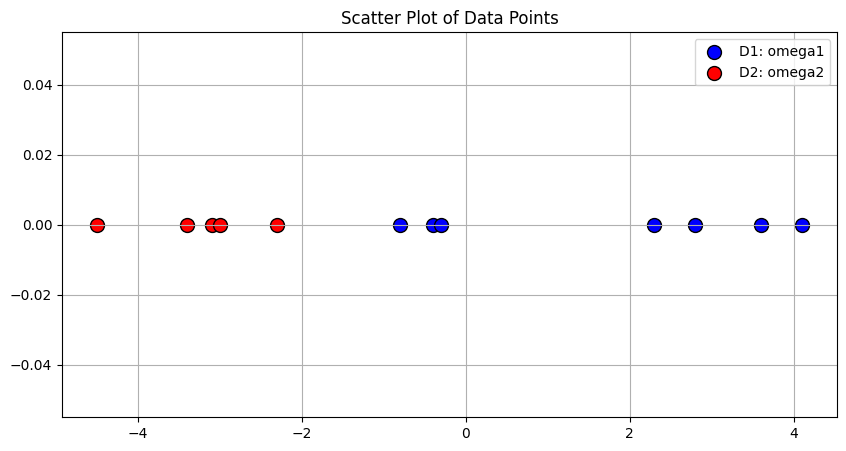

In [ ]:
# Define candidate theta values
thetaNum = 1000
thetaInterval = 100
thetaRange = np.linspace(-thetaInterval / 2, thetaInterval / 2, thetaNum)

# Initialize classifier
classifier = ML_Classifier(thetaRange)

# Data for classes omega1 (D1) and omega2 (D2)
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Scatter plot of data points
plt.figure(figsize=(10, 5))
plt.scatter(D1, np.zeros(D1.shape[0]), color='blue', s=100, label='D1: omega1', edgecolor='black')
plt.scatter(D2, np.zeros(D2.shape[0]), color='red', s=100, label='D2: omega2', edgecolor='black')
plt.legend()
plt.title("Scatter Plot of Data Points")
plt.grid()
plt.show()

Αυτό που παρατηρείται από τα δείγματα που δίνονται από την εκφώνηση είναι ότι οι 2 κλάσεις είναι γραμμικά διαχωρίσιμες. Αυτό σημαίνει ότι μπορεί να βρεθεί μια ευθεία γραμμή (σε μία διάσταση) ή ένα υπερεπίπεδο (σε περισσότερες διαστάσεις) που διαχωρίζει πλήρως τις δύο κατηγορίες
**ω1** και **ω2**, χωρίς επικάλυψη στα δεδομένα.

**Διαγράμματα Log-Likelihoods και εκτιμήσεις για θ1, θ2**

Estimated theta for D1 (class omega1): 2.552552552552555
Estimated theta for D2 (class omega2): -3.1531531531531485


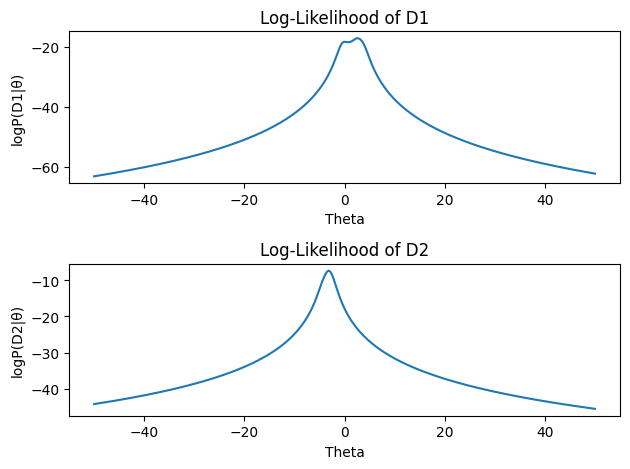

In [ ]:
# Fit the classifier and calculate log-likelihoods
log_likelihood_D1, log_likelihood_D2 = classifier.fit(D1, D2)
print("Estimated theta for D1 (class omega1):", classifier.theta1)
print("Estimated theta for D2 (class omega2):", classifier.theta2)

# Plot log-likelihoods for each class
fig, ax = plt.subplots(2, 1)
ax[0].plot(thetaRange, log_likelihood_D1)
ax[0].set_title("Log-Likelihood of D1")
ax[0].set_xlabel("Theta")
ax[0].set_ylabel("logP(D1|θ)")
ax[1].plot(thetaRange, log_likelihood_D2)
ax[1].set_title("Log-Likelihood of D2")
ax[1].set_xlabel("Theta")
ax[1].set_ylabel("logP(D2|θ)")
fig.tight_layout()
plt.show()

**Διάγραμμα Log Likelihoods/Συναρτήσεων πιθανοφάνειας**

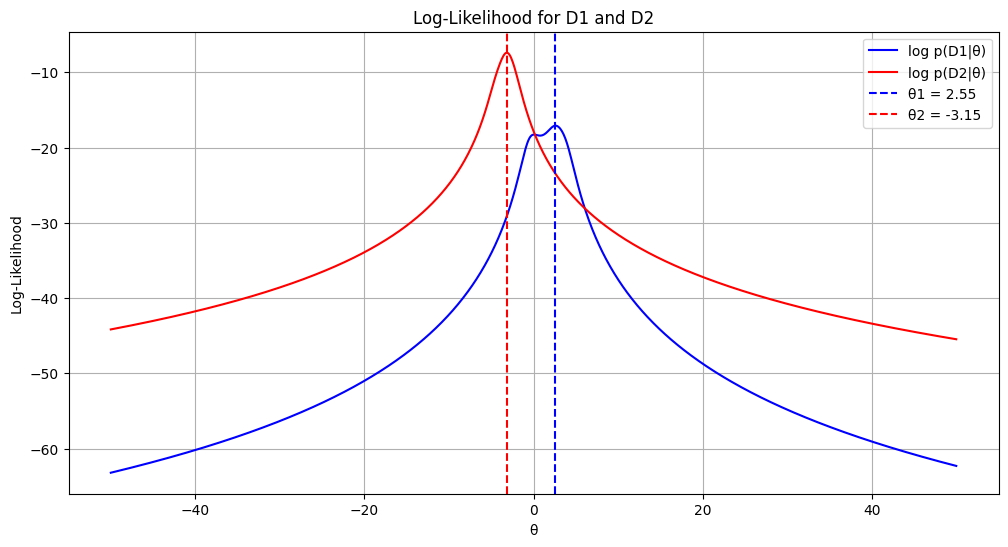

In [ ]:
# Plot both log-likelihoods on the same graph
plt.figure(figsize=(12, 6))
plt.plot(thetaRange, log_likelihood_D1, label='log p(D1|θ)', color='blue')
plt.plot(thetaRange, log_likelihood_D2, label='log p(D2|θ)', color='red')
plt.axvline(classifier.theta1, color='blue', linestyle='--', label=f'θ1 = {classifier.theta1:.2f}')
plt.axvline(classifier.theta2, color='red', linestyle='--', label=f'θ2 = {classifier.theta2:.2f}')
plt.title("Log-Likelihood for D1 and D2")
plt.xlabel("θ")
plt.ylabel("Log-Likelihood")
plt.legend()
plt.grid()
plt.show()

**Μέγιστη Πιθανοφάνεια και Εκτιμήσεις θ1, θ2:**
Η συνάρτηση log-πιθανοφάνειας για κάθε κλάση έχει ένα μέγιστο σημείο που αντιστοιχεί στην εκτίμηση της παραμέτρου θ\thetaθ μέσω της μεθόδου μέγιστης πιθανοφάνειας (MLE).


*   Για την κλάση **ω1\omega_1** (χωρίς στρες):Η μέγιστη τιμή της log(p(D1∣θ))βρίσκεται στο **$\hat{\theta_1}$ = 2.55**. Αυτό σημαίνει ότι η τιμή $\hat{\theta_1}$ = 2.55 είναι η πιο πιθανή για να περιγράψει τα δεδομένα της κλάσης ω1\omega_1.

*  Για την κλάση **ω2\omega_2** (με στρες):Η μέγιστη τιμή της log(p(D2∣θ)) βρίσκεται στο **$\hat{\theta_2}$ = −3.15**. Αυτό σημαίνει ότι η τιμή $\hat{\theta_2}$= −3.15 είναι η πιο πιθανή για να περιγράψει τα δεδομένα της κλάσης ω2\omega_2.


Η σημαντική απόσταση μεταξύ $\hat{\theta_1}$ και $\hat{\theta_2}$  (2.55 και -3.15) δείχνει ότι οι δύο κλάσεις μπορούν να διαχωριστούν με βάση τον δείκτη x. Αυτό υποδεικνύει ότι ο δείκτης x είναι αξιόπιστος για την ταξινόμηση των χρηστών σε κατάσταση στρες ή μη-στρες.


**Παρουσίαση αποτελεσμάτων της συνάρτησης διάκρισης g(x) και ορίου απόφασης**

Το διάγραμμα παρουσιάζει τη διακριτική συνάρτηση g(x), καθώς και τα δεδομένα των δύο κλάσεων (ω1\omega_1 με μπλε και ω2\omega_2 με κόκκινο), με τη γραμμή **g(x)=0** να καθορίζει το όριο απόφασης.




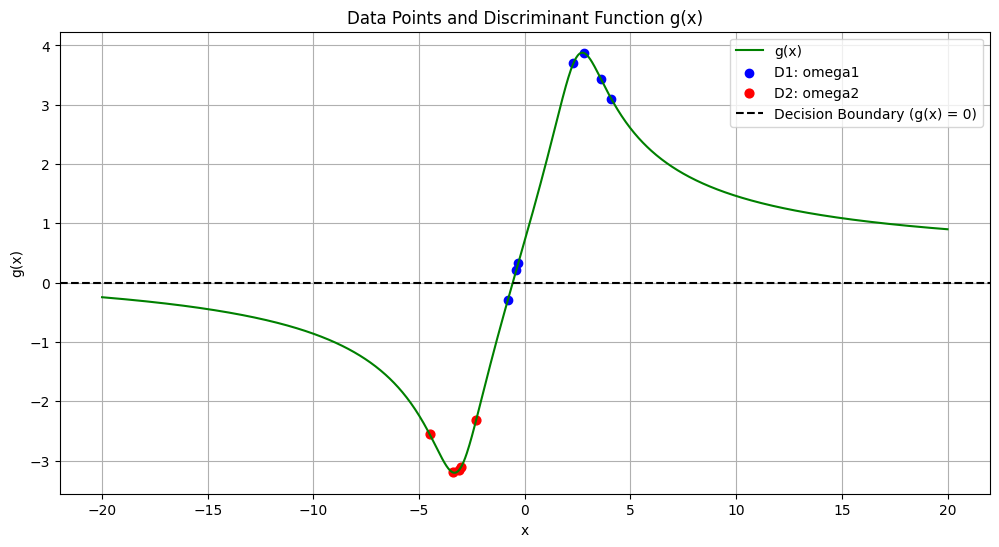

In [ ]:
# Predict classes for data points
labelsD1, g_D1 = classifier.predict(D1)
labelsD2, g_D2 = classifier.predict(D2)

# Plot discriminant function g(x)
x_values = np.linspace(-20, 20, 1000)
g_values = [classifier.g(x) for x in x_values]
plt.figure(figsize=(12, 6))
plt.plot(x_values, g_values, label='g(x)', color='green')
plt.scatter(D1, g_D1, color='blue', label='D1: omega1')
plt.scatter(D2, g_D2, color='red', s=40, label='D2: omega2')
plt.axhline(0, color='black', linestyle='--', label='Decision Boundary (g(x) = 0)')
plt.title("Data Points and Discriminant Function g(x)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid()
plt.show()

Η  g(x) είναι θετική για περιοχές όπου το x ανήκει στην κλάση ω1\omega_1 (χωρίς στρες) και αρνητική για περιοχές όπου το x ανήκει κυρίως στην κλάση ω2\omega_2 (με στρες). Υπάρχει ένα σημείο όπου η g(x) τέμνει τον άξονα x (δηλαδή g(x)=0), το οποίο αντιπροσωπεύει το όριο απόφασης. Το σημείο αυτό χωρίζει τις δύο κλάσεις. Δεδομένα στα αριστερά του ορίου απόφασης κατατάσσονται στην ω2\omega_2 (στρες), ενώ δεδομένα στα δεξιά κατατάσσονται στην ω1\omega_1 (χωρίς στρες).

Παρατηρείται ότι σχεδόν όλα τα δεδομένα της ω1\omega_1 (μπλε) βρίσκονται σε περιοχές όπου g(x) > 0, και όλα τα δεδομένα της ω2\omega_2 (κόκκινο) βρίσκονται σε περιοχές όπου g(x) < 0. Ωστόσο, υπάρχει ένα σημείο της ω1\omega_1 που ταξινομείται λανθασμένα, καθώς βρίσκεται κάτω από το όριο απόφασης. Αυτό το σφάλμα ταξινόμησης υποδηλώνει ότι, αν και οι δύο κλάσεις είναι σχεδόν γραμμικά διαχωρίσιμες, ο διαχωρισμός δεν είναι απόλυτος λόγω της εγγύτητας του συγκεκριμένου σημείου στις τιμές της ω2\omega_2.

Το διάγραμμα δείχνει έναν αρκετά σαφή διαχωρισμό μεταξύ των δύο κλάσεων, επιβεβαιώνοντας ότι ο δείκτης x είναι γραμμικά διαχωρίσιμος. Η διακριτική συνάρτηση g(x) λειτουργεί αποτελεσματικά για τη διάκριση των δύο κλάσεων, καθώς καταφέρνει να διαχωρίσει τα δεδομένα με βάση το πρόσημό της (g(x)>0 για ω1\omega_1, g(x)<0 για ω2\omega_2). Συμπερασματικά, ο δείκτης x αποδεικνύεται αξιόπιστος για την ανάλυση και την ταξινόμηση του στρες στους χρήστες, με μόνο ένα μικρό περιθώριο βελτίωσης.


**'Οριο απόφασης και αποτελέσματα κατηγοριοποιησης**

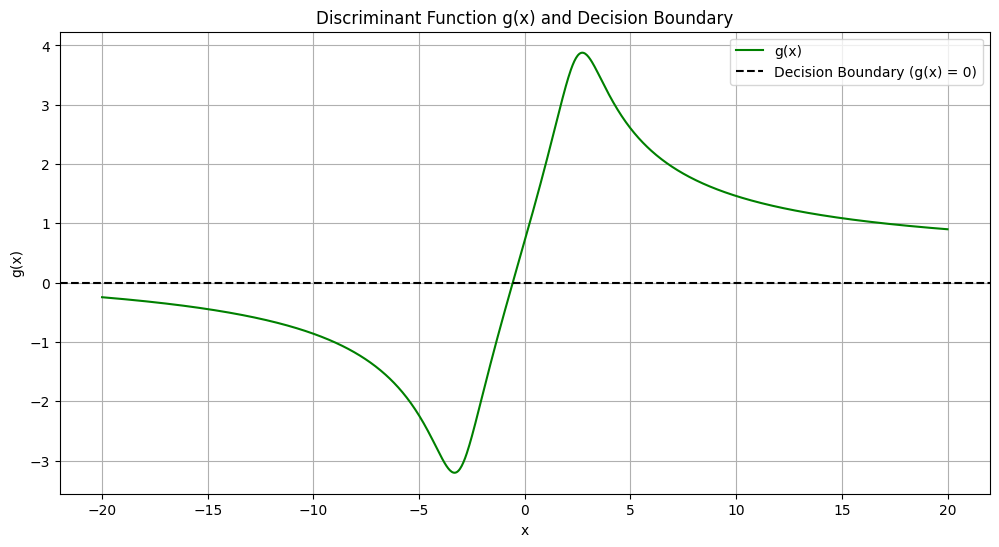

Classification Results for D1 (Real class: omega1):
Data point 1: x = 2.80, g(x) = 3.87, Predicted: omega1, Real: omega1
Data point 2: x = -0.40, g(x) = 0.21, Predicted: omega1, Real: omega1
Data point 3: x = -0.80, g(x) = -0.29, Predicted: omega2, Real: omega1
Data point 4: x = 2.30, g(x) = 3.70, Predicted: omega1, Real: omega1
Data point 5: x = -0.30, g(x) = 0.34, Predicted: omega1, Real: omega1
Data point 6: x = 3.60, g(x) = 3.44, Predicted: omega1, Real: omega1
Data point 7: x = 4.10, g(x) = 3.10, Predicted: omega1, Real: omega1

Classification Results for D2 (Real class: omega2):
Data point 1: x = -4.50, g(x) = -2.56, Predicted: omega2, Real: omega2
Data point 2: x = -3.40, g(x) = -3.20, Predicted: omega2, Real: omega2
Data point 3: x = -3.10, g(x) = -3.16, Predicted: omega2, Real: omega2
Data point 4: x = -3.00, g(x) = -3.10, Predicted: omega2, Real: omega2
Data point 5: x = -2.30, g(x) = -2.32, Predicted: omega2, Real: omega2


In [ ]:
# Plot decision boundary only
plt.figure(figsize=(12, 6))
plt.plot(x_values, g_values, label='g(x)', color='green')
plt.axhline(0, color='black', linestyle='--', label='Decision Boundary (g(x) = 0)')
plt.title("Discriminant Function g(x) and Decision Boundary")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid()
plt.show()

# Print classification results with g(x) values for D1
print("Classification Results for D1 (Real class: omega1):")
for i, (x, g_val, label) in enumerate(zip(D1, g_D1, labelsD1)):
    print(f"Data point {i+1}: x = {x:.2f}, g(x) = {g_val:.2f}, Predicted: {label}, Real: omega1")

# Print classification results with g(x) values for D2
print("\nClassification Results for D2 (Real class: omega2):")
for i, (x, g_val, label) in enumerate(zip(D2, g_D2, labelsD2)):
    print(f"Data point {i+1}: x = {x:.2f}, g(x) = {g_val:.2f}, Predicted: {label}, Real: omega2")

#Μέρος Β

## **Bayes Classifier**

Στο δεύτερο μέρος της εργασίας, ζητείται η υλοποίηση ενός ταξινομητή, στον οποίο η άγνωστη παράμετρος θ εκτιμάται μέσω της **μεθόδου** **Bayes**. Αντίστοιχα με το πρώτο μέρος, δημιουργείται η κλάση **BayesianClassifier**, ενώ ο ταξινομητής έχει σχεδιαστεί για ακόμη μια φορά έτσι, ώστε να ταξινομεί δεδομένα σε δύο κλάσεις (χωρίς στρες = κλάση ω1, με στρες = κλάση ω2).


###**Δομή και λειτουργία BayesianClassifier**

---



**Αρχικοποίηση**

 Η κλάση δέχεται ως είσοδο έναν πίνακα με υποψήφιες τιμές για την παράμετρο θ κατά την αρχικοποίηση (**theta_values**), καθώς και τις a-priori πιθανότητες για τις κλάσεις ω1 και ω2 (**prior_w1** και **prior_w2** αντίστοιχα). Αυτές οι τιμές αποθηκεύονται ως attributes και χρησιμοποιούνται για την εκτίμηση των παραμέτρων των δύο κλάσεων.
$$$$

**Υπολογισμός Πυκνότητας Πιθανότητας (prior)**

Η συνάρτηση **prior(self, theta**) υπολογίζει την πυκνότητα πιθανότητας για δεδομένο σύνολο τιμών της παραμέτρου θ, χρησιμοποιώντας την σχέση:
$$
p(\theta) = \frac{1}{10\pi} \cdot \frac{1}{1 + (\theta/10)^2}
$$
$$$$

**Υπολογισμός Πιθανότητας p(x|θ)**

 Η συνάρτηση **likelihood(self, x, theta)** υπολογίζει την υπό συνθήκη πιθανότητα για ένα σύνολο δεδομένων x και έναν πίνακα με τιμές της παραμέτρου θ. Η πιθανότητα υπολογίζεται μέσω της **κατανομής Cauchy**:
 $$
p(x|\theta) = \frac{1}{\pi} \cdot \frac{1}{1 + (x - \theta)^2}
$$
$$$$

**Εκπαίδευση (fit)**

Η συνάρτηση **fit(self, D, theta)** υπολογίζει την εκ των υστέρων πιθανότητα p(θ∣D) με βάση ένα σύνολο παρατηρήσεων D και υποψήφιες τιμές για την παράμετρο θ. Αρχικά, υπολογίζει την πιθανότητα p(D∣θ) (likelihood) για κάθε τιμή του
θ ως το γινόμενο των επιμέρους πιθανοτήτων για τα δεδομένα D:
 $$
p(D|\theta) = \prod_{i=1}^{N} p(x_n|θ)
$$

Στη συνέχεια, πολλαπλασιάζει την πιθανότητα αυτή με την εκ των προτέρων πιθανότητα p(θ) για να παραχθεί η μη κανονικοποιημένη εκ των υστέρων πιθανότητα. Για να κανονικοποιηθεί το αποτέλεσμα, υπολογίζει μια σταθερά κανονικοποίησης μέσω της αριθμητικής ολοκλήρωσης (με τη **μέθοδο του τραπεζίου**) και επιστρέφει την κανονικοποιημένη εκ των υστέρων πιθανότητα p(θ∣D).
 $$
p(\theta|D) = \frac{p(D|\theta) ⋅ p(\theta)}{\int p(D|\theta) ⋅ p(\theta)d\theta}
$$
$$$$

**Πρόβλεψη (predict)**

Η συνάρτηση **predict(self, x, theta_values, posterior_D1, posterior_D2)** υπολογίζει τη **διακριτική συνάρτηση h(x)**, η οποία χρησιμοποιείται για την ταξινόμηση ενός δεδομένου σημείου x και δίνεται από τη σχέση:
$$
h(x) = logP(x|D_1) - logP(x|D_2) + logP(ω1) - logP(ω2)
$$

Χρησιμοποιεί τις υποψήφιες τιμές της παραμέτρου θ, καθώς και τις εκ των υστέρων πιθανότητες p(θ∣D1) και p(θ∣D2) για τις δύο κλάσεις ω1​ και ω2 αντίστοιχα. Για κάθε κλάση, υπολογίζει την πιθανότητα p(x∣Di) ως ολοκλήρωση του γινομένου της συνάρτησης πιθανότητας p(x∣θ) με την εκ των υστέρων πιθανότητα p(θ∣Di). Στη συνέχεια, υπολογίζει τη διακριτική συνάρτηση h(x) ως τη διαφορά των λογαρίθμων αυτών των πιθανοτήτων, προσαρμοσμένη με τους λογαρίθμους των εκ των προτέρων πιθανοτήτων των δύο κλάσεων. Το πρόσημο της h(x) καθορίζει την ταξινόμηση του
x, δηλαδή:


*   Αν **h(x) > 0**, τότε το x ανήκει στην κλάση **ω1**
*   Αν **h(x) < 0**, τότε το x ανήκει στην κλάση **ω2**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BayesianClassifier:
    def __init__(self, theta_values, prior_w1, prior_w2):
        """
        Initializes the Bayesian Classifier with given theta values and class priors.

        Parameters:
        - theta_values: Array of candidate parameter values for theta.
        - prior_w1: Prior probability of class omega1.
        - prior_w2: Prior probability of class omega2.
        """
        self.theta_values = theta_values
        self.prior_w1 = prior_w1
        self.prior_w2 = prior_w2

    def prior(self, theta):       # Prior p(theta)
        """
        Computes the prior probability density function p(theta).

        Parameters:
        - theta: Array of theta values.

        Returns:
        - Array of prior probabilities.
        """
        return 1 / (10 * np.pi * (1 + (theta / 10) ** 2))


    def likelihood(self, x, theta):       # Likelihood p(x|theta)
        """
        Computes the likelihood function p(x|theta).

        Parameters:
        - x: Data points (scalar or array).
        - theta: Array of theta values.

        Returns:
        - Array of likelihood values.
        """
        return 1 / (np.pi * (1 + (x - theta) ** 2))


    def fit(self, D, theta):    # Posterior p(theta|D)

        """
        Calculates the posterior probability density p(theta|D) for the given data D.

        Parameters:
        - D: Array of observed data points.
        - theta: Array of candidate theta values.

        Returns:
        - Array of posterior probabilities normalized to sum to 1.
        """
        likelihoods = np.prod(self.likelihood(D[:, None], theta), axis=0)
        unnormalized_posterior = likelihoods * self.prior(theta)
        normalization_constant = np.trapz(unnormalized_posterior, theta)  # Integration using the trapezoid method
        return unnormalized_posterior / normalization_constant

    def predict(self, x, theta_values, posterior_D1, posterior_D2):
        """
        Computes the discriminant function h(x) to classify a data point.

        Parameters:
        - x: The data point to classify.
        - theta_values: Array of candidate theta values.
        - posterior_D1: Posterior probabilities for class omega1.
        - posterior_D2: Posterior probabilities for class omega2.

        Returns:
        - The value of the discriminant function h(x).
        """
        likelihood_x_D1 = np.trapz(self.likelihood(x, theta_values) * posterior_D1, theta_values)
        likelihood_x_D2 = np.trapz(self.likelihood(x, theta_values) * posterior_D2, theta_values)
        return np.log(likelihood_x_D1) - np.log(likelihood_x_D2) + np.log(self.prior_w1) - np.log(self.prior_w2)


###**Δημιουργία Αντικειμένου Ταξινομητή - Αρχικοποίηση και Ταξινόμηση Δεδομένων**





In [ ]:
# Data for Classes omega1 and omega2
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Define Candidate theta Values
theta_values = np.linspace(-20, 20, 500)

# Initialize Bayesian Classifier
bayesian_classifier = BayesianClassifier(theta_values, 7/12, 5/12)

# Calculate Posterior Distributions for D1 and D2
posterior_D1 = bayesian_classifier.fit(D1, theta_values)
posterior_D2 = bayesian_classifier.fit(D2, theta_values)

# Compute the Discriminant Function h(x) for a Range of x Values
x_values = np.linspace(-20, 20, 500)
h_values = np.array([bayesian_classifier.predict(x, theta_values, posterior_D1, posterior_D2) for x in x_values])

# Classify Data Points from D1 and D2 and Calculate h(x) Values
classified_D1 = [
    (x, "ω1" if bayesian_classifier.predict(x, theta_values, posterior_D1, posterior_D2) > 0 else "ω2", bayesian_classifier.predict(x, theta_values, posterior_D1, posterior_D2))
    for x in D1
]
classified_D2 = [
    (x, "ω1" if bayesian_classifier.predict(x, theta_values, posterior_D1, posterior_D2) > 0 else "ω2", bayesian_classifier.predict(x, theta_values, posterior_D1, posterior_D2))
    for x in D2
]


###**Απεικόνιση Πυκνοτήτων Πιθανοτητας**

Παρακάτω, απεικονίζονται οι γραφικές παραστάσεις των εκ των υστέρων πυκνοτήτων πιθανότητας για τα σύνολα D1 και D2 (p(θ|D1) και p(θ|D2) αντίστοιχα), καθώς και η αρχική πυκνότητα πιθανότητας p(θ). Το διάγραμμα αυτό διευκολύνει τη μεταξύ τους σύγκριση, ενώ, παράλληλα, ευνοεί τις παρατηρήσεις και την εξαγωγή συμπερασμάτων, σχετικά με την αποτελεσματικότητα της παραμέτρου θ, όσον αφορά την κατηγοριοποίηση δεδομένων.  

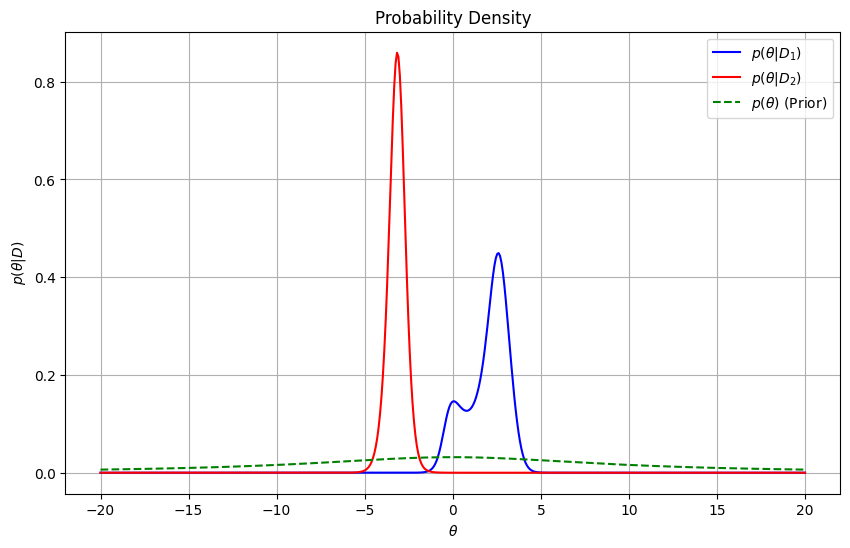

In [ ]:
# Plot the Prior and Posterior Probability Densities
plt.figure(figsize=(10, 6))
plt.plot(theta_values, posterior_D1, label=r"$p(\theta|D_1)$", color="blue")  # p(theta|D1)
plt.plot(theta_values, posterior_D2, label=r"$p(\theta|D_2)$", color="red")   # p(theta|D2)
plt.plot(theta_values, bayesian_classifier.prior(theta_values), label=r"$p(\theta)$ (Prior)", color="green", linestyle="--")  # p(theta) (prior)
plt.title("Probability Density")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta|D)$")
plt.legend()
plt.grid()
plt.show()

Τα κύρια συμπεράσματα από το διάγραμμα είναι τα εξής:

1. **Διακριτές κατανομέ**ς: Οι εκ των υστέρων κατανομές p(θ∣D1) και p(θ∣D2) είναι
διακριτές, καθώς εμφανίζουν μέγιστα σε διαφορετικές τιμές του θ. Αυτό υποδηλώνει ότι τα δεδομένα των δύο κλάσεων D1 και D2 έχουν αρκετή πληροφορία για να διαφοροποιήσουν τις τιμές της παραμέτρου θ.

2. **Εκ των προτέρων πιθανότητα**: Η εκ των προτέρων πιθανότητα p(θ) είναι σχετικά σταθερή και χαμηλή σε σύγκριση με τις εκ των υστέρων πιθανότητες. Αυτό δείχνει ότι τα δεδομένα D1 και D2 έχουν ενημερώσει σημαντικά την αρχική εκτίμηση της κατανομής θ.

3. **Επικάλυψη των κατανομών**: Υπάρχει ελάχιστη ή καθόλου επικάλυψη μεταξύ των
p(θ∣D1) και p(θ∣D2), κάτι που υποδηλώνει ότι οι δύο κλάσεις είναι καλά διαχωρίσιμες με βάση την παράμετρο θ.

4. **Πιθανότερες τιμές**: Οι κορυφές των κατανομών δείχνουν τις πιο πιθανές τιμές της παραμέτρου θ για τις κλάσεις D1 και D2​. Η κόκκινη καμπύλη έχει το μέγιστό της κοντά στο −5, ενώ η μπλε κοντά στο 5, υποδεικνύοντας ότι η κάθε κλάση έχει διαφορετική σχέση με την παράμετρο θ.

5. **Συμβολή δεδομένων στην εκτίμηση**: Η έντονη διαφορά μεταξύ των εκ των υστέρων κατανομών και της εκ των προτέρων κατανομής p(θ) επιβεβαιώνει ότι τα δεδομένα D1 και D2 παρέχουν ουσιαστική πληροφορία για την ενημέρωση των πιθανών τιμών της θ.

Συνολικά, το διάγραμμα δείχνει ότι οι δύο κλάσεις είναι καλά διαχωρίσιμες, και η παράμετρος θ μπορεί να χρησιμοποιηθεί αποτελεσματικά για την κατηγοριοποίηση των δεδομένων.

###**Απεικόνιση της Διακριτικής Συνάρτησης - Αποτελέσματα Ταξινόμησης**

Στο διάγραμμα που ακολουθεί, απεικονίζεται η διακριτική συνάρτηση h(x) που αναπτύχθηκε παραπάνω, για ένα σύνολο τιμών x. Επιπλέον, φαίνεται η ευθεία του ορίου απόφασης (**h(x) = 0**), ενώ παρουσιάζονται και τα διακριτά σημεία των συνόλων D1 και D2, με χρώμα που φανερώνει την κλάση στην οποία ταξινομήθηκαν:
*   Μπλε χρώμα $\rightarrow$ Κλάση ω1 (h(x) > 0)
*   Κόκκινο χρώμα $\rightarrow$ Κλάση ω2 (h(x) < 0)

Τέλος, παρουσιάζονται και τα αποτελέσματα της κατηγοριοποίησης των τιμών των συνόλων D1 και D2, σύμφωνα με τη συνάρτηση predict του ζητούμενου ταξινομητή.

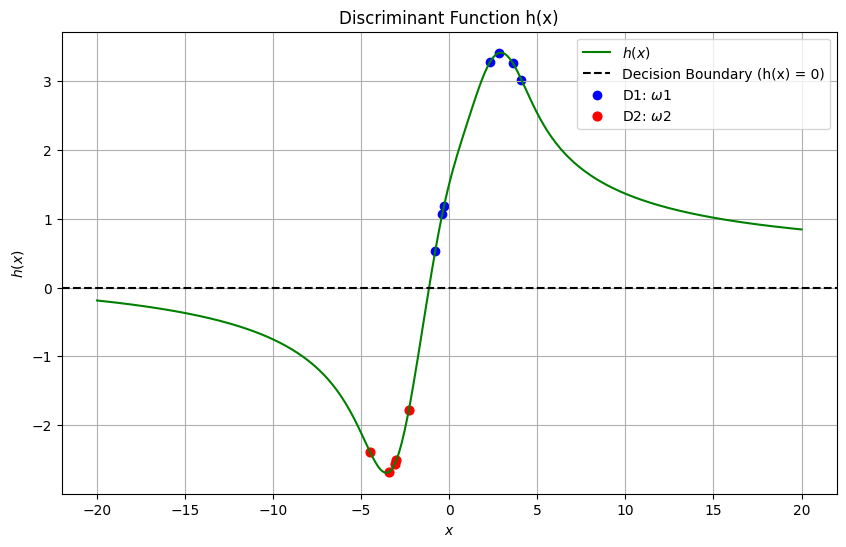

Classification for Values of D1:
Data point 1: x = 2.80, h(x) = 3.41, Predicted: ω1, Real: omega1
Data point 2: x = -0.40, h(x) = 1.07, Predicted: ω1, Real: omega1
Data point 3: x = -0.80, h(x) = 0.53, Predicted: ω1, Real: omega1
Data point 4: x = 2.30, h(x) = 3.27, Predicted: ω1, Real: omega1
Data point 5: x = -0.30, h(x) = 1.19, Predicted: ω1, Real: omega1
Data point 6: x = 3.60, h(x) = 3.27, Predicted: ω1, Real: omega1
Data point 7: x = 4.10, h(x) = 3.02, Predicted: ω1, Real: omega1

Classification for Values of D2:
Data point 1: x = -4.50, h(x) = -2.39, Predicted: ω2, Real: omega2
Data point 2: x = -3.40, h(x) = -2.68, Predicted: ω2, Real: omega2
Data point 3: x = -3.10, h(x) = -2.57, Predicted: ω2, Real: omega2
Data point 4: x = -3.00, h(x) = -2.51, Predicted: ω2, Real: omega2
Data point 5: x = -2.30, h(x) = -1.79, Predicted: ω2, Real: omega2


In [ ]:
# Extract h(x) Values for Plotting
h_D1 = [classified_D1[i][2] for i in range(len(D1))]
h_D2 = [classified_D2[i][2] for i in range(len(D2))]

# Plot the Discriminant Function h(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, h_values, label=r"$h(x)$", color="green")
plt.axhline(0, color="black", linestyle="--", label="Decision Boundary (h(x) = 0)")
plt.scatter(D1, h_D1, color='blue', label='D1: $\omega1$')
plt.scatter(D2, h_D2, color='red', s=40, label='D2: $\omega2$')
plt.title("Discriminant Function h(x)")
plt.xlabel(r"$x$")
plt.ylabel(r"$h(x)$")
plt.legend()
plt.grid()
plt.show()

# Print Classification Results with h(x) Values for D1
print("Classification for Values of D1:")
for i, (x, cls, h_val) in enumerate(classified_D1):
    print(f"Data point {i+1}: x = {x:.2f}, h(x) = {h_val:.2f}, Predicted: {cls}, Real: omega1")

# Print Classification Results with h(x) Values for D2
print("\nClassification for Values of D2:")
for i, (x, cls, h_val) in enumerate(classified_D2):
    print(f"Data point {i+1}: x = {x:.2f}, h(x) = {h_val:.2f}, Predicted: {cls}, Real: omega2")

**Παρατηρήσεις**

1. **Κατηγοριοποίηση δεδομένων**: Τα δεδομένα της κλάσης D1 (μπλε σημεία) βρίσκονται σε περιοχές όπου h(x)>0, επιβεβαιώνοντας ότι ταξινομούνται σωστά ως ω1. Αντίστοιχα, τα δεδομένα της κλάσης D2 (κόκκινα σημεία) βρίσκονται κυρίως σε περιοχές όπου h(x)<0, υποδεικνύοντας τη σωστή ταξινόμησή τους ως ω2.

2. **Σταθερότητα της h(x)**: Η συνάρτηση h(x) παρουσιάζει μεγάλες αλλαγές γύρω από την περιοχή του ορίου απόφασης (x=−2.5), ενώ γίνεται πιο σταθερή στις περιοχές εκτός του διαστήματος αυτού (x>5 ή x<−10).

3. **Αποτελεσματικότητα κατηγοριοποίησης**: Το γεγονός ότι τα σημεία των δεδομένων βρίσκονται στη σωστή πλευρά του ορίου απόφασης, υποδεικνύει την αποτελεσματικότητα του ταξινομητή. Οι κλάσεις D1 και D2 φαίνεται να διαχωρίζονται καθαρά.

Συνολικά, το διάγραμμα δείχνει έναν καλά διαχωρίσιμο χώρο δεδομένων, όπου η διαχωριστική συνάρτηση h(x) ταξινομεί με επιτυχία τα δεδομένα στις αντίστοιχες κλάσεις.

###**Τελικά Συμπεράσματα**

Από τα αποτελέσματα της κατηγοριοποίησης, καθώς και από τα διαγράμματα που μελετήθηκαν παραπάνω, προκύπτει το συμπέρασμα πως ο ταξινομητής που υλοποιήθηκε με τη μέθοδο εκτίμησης κατά Bayes είναι πιο ακριβής και αποτελεσματικός από τον ταξινομητή μέγιστης πιθανοφάνειας. Χαρακτηριστικό στοιχείο αιτιολόγησης αποτελεί το γεγονός ότι ο Bayesian ταξινομητής κατάφερε να κατηγοριοποιήσει σωστά όλα τα σημεία των συνόλων D1 και D2, ενώ η μέθοδος μέγιστης πιθανοφάνειας παρουσίασε αστοχία στην κατηγοριοποίηση του σημείου **x = -0.80**.

Η μέθοδος **Μέγιστης Πιθανοφάνειας (ML)** και η **Bayesian Εκτίμηση (BE)** διαφέρουν σε τρία βασικά σημεία. Στην υπολογιστική **πολυπλοκότητα**, η ML είναι πιο απλή, καθώς απαιτεί μόνο διαφορικό λογισμό ή αναζήτηση μέσω gradient, ενώ η BE περιλαμβάνει πολύπλοκη και πολυδιάστατη ολοκλήρωση. Όσον αφορά την **ερμηνευσιμότητα**, η ML επιστρέφει ένα μόνο μοντέλο από το σύνολο που παρέχει ο σχεδιαστής, καθιστώντας τη λύση ευκολότερη στην ερμηνεία, ενώ η BE υπολογίζει έναν σταθμισμένο μέσο όρο μοντέλων, γεγονός που μπορεί να οδηγήσει σε ένα μοντέλο που δεν υπήρχε στο αρχικό σύνολο. Τέλος, σχετικά με την **απόδοση**, η ML δεν λαμβάνει υπόψη την εκ των προτέρων κατανομή των παραμέτρων, ενώ η BE αξιοποιεί αυτές τις πληροφορίες, οδηγώντας σε καλύτερες λύσεις. Συνεπώς, οι παραπάνω διαφορές δικαιολογούν και επιβεβαιώνουν τα αποτελέσματα που προέκυψαν από την ανάπτυξη των δύο ταξινομητών.

#Μέρος Γ

### **Libraries that may be needed**

In [ ]:
#""""---  Part C ---""""
#""""---  Task 1 ---""""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
import random
import statistics
import seaborn as sns

from sklearn import datasets,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

## **Part 1**

### **Εισαγωγή και επεξεργασία(σύμφωνα με εκφώνηση) δεδομένων για το φυτό της Ίριδας**



Το σύνολο δεδομένων Iris φορτώθηκε μέσω της βιβλιοθήκης sklearn.datasets. Παρουσιάζονται τα συνοπτικά στατιστικά του dataset, συμπεριλαμβανομένων των πρώτων πέντε γραμμών των δεδομένων και των στατιστικών περιγραφών τους. Επιπλέον, πραγματοποιείται καταμέτρηση του αριθμού δειγμάτων που αντιστοιχούν σε κάθε κλάση (Iris setosa, Iris versicolor, Iris virginica).
Για τη βελτίωση της κατανόησης της κατανομής του dataset, δημιουργήθηκε ένα διάγραμμα τύπου bar chart, το οποίο απεικονίζει τη συχνότητα των δειγμάτων ανά κλάση.


%---%--- Part C ---%---%


%--- Iris Dataset Information ---%

Summary dataset Statistics:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

Dataset Satistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.0000

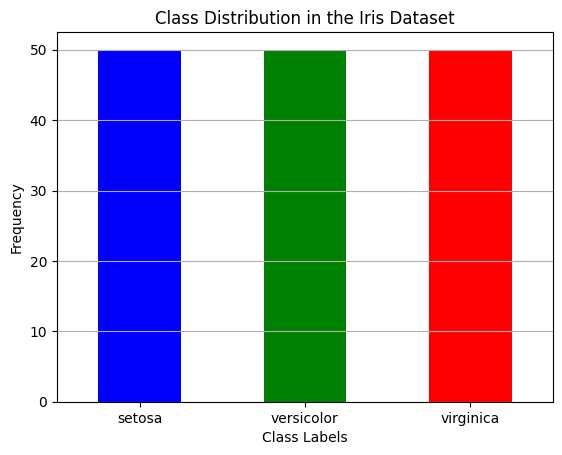

In [ ]:
print("%---%--- Part C ---%---%\n\n")
print("%--- Iris Dataset Information ---%\n")
# Load Iris dataset
iris = datasets.load_iris(as_frame=True)
# Show dataset summary statistics
print("Summary dataset Statistics:\n",iris['data'].head(),'\n')
# Show dataset statistics
print("Dataset Satistics:\n", iris['data'].describe(),"\n")
# Show how many values exist in each class
print("Number of samples in every class:\n", iris['target'].value_counts(),"\n")
# Data quantity vizualization
targetSeries = pd.Series(iris.target)
# Plot the value counts as a bar chart
targetSeries.value_counts().plot(kind='bar', rot=0, color=['blue', 'green', 'red'])
plt.title("Class Distribution in the Iris Dataset")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(ticks=range(3), labels=iris.target_names)  # Add class names
plt.grid(axis='y')
plt.show()

### **Διαχωρισμός dataset και μείωση features**


Το σύνολο δεδομένων μειώνεται στα δύο πρώτα χαρακτηριστικά (μήκος και πλάτος των σεπάλων), όπως προβλέπεται από την εκφώνηση. Η συγκεκριμένη επιλογή αποσκοπεί στην απλοποίηση του προβλήματος και στην οπτικοποίηση των αποτελεσμάτων ταξινόμησης.

Τα δεδομένα χωρίζονται σε δύο υποσύνολα: εκπαίδευσης (50%) και σύνολο ελέγχου (50%). Ο διαχωρισμός πραγματοποιήθηκε με χρήση της μεθόδου **train_test_split** της βιβλιοθήκης sklearn, με ενεργοποιημένη την τυχαία δειγματοληψία και καθορισμένο τον παράγοντα random_state.

In [ ]:
irisDataset = datasets.load_iris()
X = irisDataset.data
y = irisDataset.target
# Get Class names and the names of first 2 features
featureNames = irisDataset.feature_names[:2]
classNames = irisDataset.target_names

# Reduce dataset to 2 features
XReduced = irisDataset.data[:, 0:2]  # Only the first two features are used

# Split into training and testing datasets with training 50% as instructed
XTrain, XTest, yTrain, yTest = train_test_split(XReduced, y, test_size=0.5, shuffle=True, random_state=42)

### **Συνάρτηση tuning_depth_DTC()**



Δέχεται ως είσοδο τα σύνολα εκπαιδευσης και ελέγχου και τα labels τους. Παρακάτω παρουσιάζονται τα βήματα που εκτελεί:
1.	**Εκπαίδευση και Βασική Ανάλυση**: Η συνάρτηση ξεκινά εκπαιδεύοντας ένα default Decision Tree για να καθορίσει το μέγιστο βάθος του. Το μέγιστο βάθος ορίζεται από την έτοιμη συνάρτηση get_depth() του ταξινομητή.
2.	**Ανάλυση με Διαφορετικά Βάθη**: Δημιουργείται ένας πίνακας από Decision Tree Classifiers, όπου κάθε ένας εκπαιδεύεται με διαφορετικό μέγιστο βάθος (από 1 έως το μέγιστο βάθος). Για κάθε δέντρο υπολογίζεται η ακρίβεια στο σύνολο ελέγχου, τόσο ως απόλυτη τιμή όσο και ως ποσοστό.
3.	**Εύρεση Βέλτιστου Βάθους**: Η συνάρτηση εντοπίζει το βάθος που οδηγεί στη μέγιστη ακρίβεια και ο ταξινομητής με το βέλτιστο βάθος αποθηκεύεται και επιστρέφεται ως αποτέλεσμα.
4.	**Οπτικοποίηση Αποτελεσμάτων**: Δημιουργείται γράφημα που παρουσιάζει την ακρίβεια (σε ποσοστά) σε σχέση με το βάθος του δέντρου. Το βέλτιστο βάθος επισημαίνεται με μία κατακόρυφη γραμμή, διευκολύνοντας την κατανόηση των αποτελεσμάτων.
5.	**Επιστροφή Αποτελεσμάτων**: Η συνάρτηση επιστρέφει τον ταξινομητή με το βέλτιστο βάθος, καθώς και ένα dictionary που περιέχει πληροφορίες για όλα τα βάθη, τις ακρίβειες και το καλύτερο βάθος.

In [ ]:
def tuning_depth_DTC(XTrain, XTest, yTrain, yTest):
    """
    Analyze Decision Tree Classifier with varying depths.
    Parameters:
    XTrain, XTest: Features for training and testing
    yTrain, yTest: Labels for training and testing
    Returns:
    - bestModel: The DecisionTreeClassifier with the best depth
    - results: Dictionary containing details about depths, accuracy scores, and the best depth
    """

    # Train a default Decision Tree and find its maximum depth
    DTClassifier = DecisionTreeClassifier()
    DTClassifier.fit(XTrain, yTrain)
    depth = DTClassifier.get_depth()
    print(f"Maximum depth of the default Decision Tree: {depth}\n")

    # Evaluate Decision Tree with varying depths
    DTClassifiersMatrix = []  # List to store Decision Tree models
    accuracyScores = np.zeros((depth + 1, 1))  # Raw accuracy scores
    accuracyScoresPerc = np.zeros((depth + 1, 1))  # Accuracy as percentages
    depths = np.zeros((depth + 1, 1), dtype=int)  # Depths array for matching dimensions

    # Train Decision Trees with different maximum depths
    for i in range(1, depth + 1):
        # Initialize Decision Tree with a specific depth
        DTClassifier_i = DecisionTreeClassifier(max_depth=i)
        DTClassifier_i.fit(XTrain, yTrain)
        DTClassifiersMatrix.append(DTClassifier_i)

        # Make predictions and calculate accuracy
        predictions = DTClassifier_i.predict(XTest)
        accuracyScores[i] = accuracy_score(y_true=yTest, y_pred=predictions)
        accuracyScoresPerc[i] = accuracyScores[i] * 100  # Convert to percentage
        depths[i] = i

    # Round accuracy scores for better readability
    accuracyScoresPerc = np.round(accuracyScoresPerc, 4)

    # Find the depth with the highest accuracy
    topAccuracyIndex = np.argmax(accuracyScoresPerc[1:]) + 1  # Start from index 1 to skip depth=0
    topDepth = depths[topAccuracyIndex, 0]
    topAccuracyValue = accuracyScoresPerc[topAccuracyIndex, 0]
    bestModel = DTClassifiersMatrix[topAccuracyIndex - 1]

    # Print results
    print("Results:")
    print(f"All Accuracy Scores (percentages): {accuracyScoresPerc[1:, 0]}")  # Skip depth=0
    print(f"Most efficient depth of tree: {topDepth}")
    print(f"Accuracy at best depth: {topAccuracyValue:.2f}%\n")

    # Plot Accuracy Scores
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, depth + 1), accuracyScoresPerc[1:], marker='o', color='b', label="Accuracy (%)")
    plt.axvline(x=topDepth, color='r', linestyle='--', label=f"Best Depth: {topDepth}")
    plt.xlabel("Tree Depth")
    plt.ylabel("Accuracy (%)")
    plt.title("Decision Tree Accuracy vs Depth")
    plt.legend()
    plt.grid()
    plt.show()

    # Return the best model and results as a dictionary
    results = {
        "depths": depths[1:],  # Exclude depth=0
        "accuracy_scores_percentage": accuracyScoresPerc[1:],
        "best_depth": topDepth,
        "best_accuracy": topAccuracyValue,
    }
    return bestModel, results

### **Ανάλυση και Αξιολόγηση Ταξινομητή Απόφασης (Decision Tree Classifier) για το Iris**

Η **tuning_depth_DTC** χρησιμοποιείται για τη διερεύνηση της απόδοσης του DTC με διαφορετικά βάθη. Εντοπίζεται το βέλτιστο βάθος, το οποίο οδηγεί στη μέγιστη ακρίβεια ταξινόμησης και απεικονίζεται γραφικά μέσω της έτοιμης plot_tree, παρουσιάζοντας τη δομή του δέντρου και τους κόμβους απόφασης.

Στη συνέχεια, ο ταξινομητής χρησιμοποιείται για την πρόβλεψη των κλάσεων του συνόλου δοκιμής. Υπολογίζεται η ακρίβεια του μοντέλου και το classification report, που περιλαμβάνει μετρικές όπως  η ακρίβεια, η ανάκληση (recall) και το F1-score για κάθε κλάση .
Παράλληλα, δημιουργείται και οπτικοποιείται ο confusion matrix, ο οποίος δείχνει τη συμφωνία μεταξύ των πραγματικών και προβλεπόμενων ετικετών για το σύνολο δοκιμής. Ο πίνακας επιτρέπει την αναγνώριση πιθανών σφαλμάτων ταξινόμησης ανάμεσα στις κλάσεις.



%--- Task 1: Decision Tree Classifier Analysis and Decision Boundaries ---%

Maximum depth of the default Decision Tree: 11

Results:
All Accuracy Scores (percentages): [64.     77.3333 78.6667 77.3333 77.3333 77.3333 73.3333 73.3333 73.3333
 72.     70.6667]
Most efficient depth of tree: 3
Accuracy at best depth: 78.67%



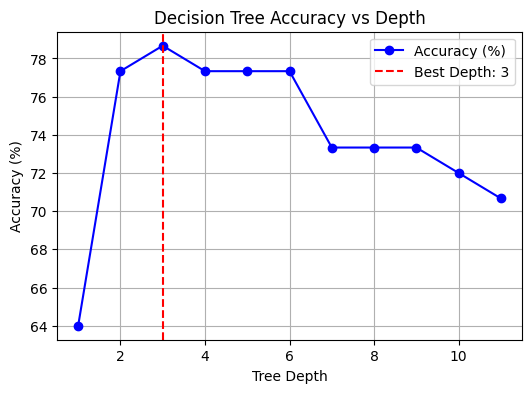

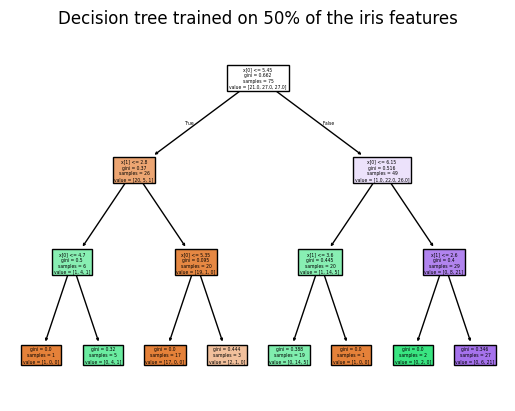


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      0.97      0.98        29
  versicolor       0.64      0.70      0.67        23
   virginica       0.68      0.65      0.67        23

    accuracy                           0.79        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.79      0.79      0.79        75



<Figure size 200x100 with 0 Axes>

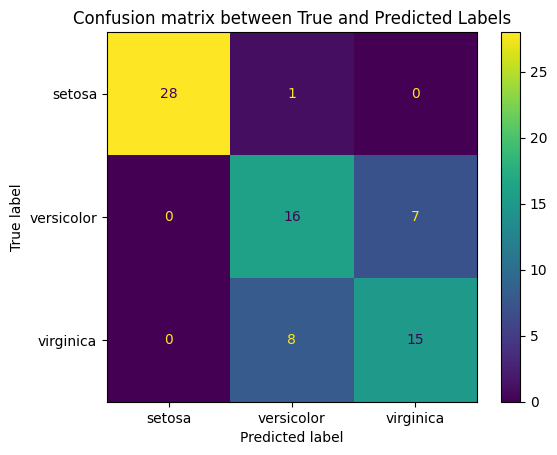


Best Depth: 3
Accuracy at Best Depth: 78.6667%
Best Model: DecisionTreeClassifier(max_depth=3)


In [ ]:
print("\n%--- Task 1: Decision Tree Classifier Analysis and Decision Boundaries ---%\n")
# Call the function
bestModel, results = tuning_depth_DTC(XTrain, XTest, yTrain, yTest)

# Vizualize the tree
plt.figure()
tree.plot_tree(bestModel, filled=True)
plt.title("Decision tree trained on 50% of the iris features")
plt.show()

# Use the tree to make the classification on the test set
yPred = bestModel.predict(XTest)
# Classification report
print("\nClassification Report:")
print(sklearn.metrics.classification_report(yTest, yPred, target_names=iris.target_names))

# Calculate and visualize Confusion Matrix
plt.figure(figsize=(2, 1))
ConfusionMatrixDisplay.from_predictions(yTest, yPred, display_labels=classNames)
plt.title("Confusion matrix between True and Predicted Labels")
plt.show()

# Display results
print(f"\nBest Depth: {results['best_depth']}")
print(f"Accuracy at Best Depth: {results['best_accuracy']}%")
print(f"Best Model: {bestModel}")

**Συμπεράσματα**

**Βέλτιστο βάθος δέντρου:3** (μέγιστη ακρίβεια ταξινόμησης στο σύνολο δοκιμής).

**Ακρίβεια στο βέλτιστο βάθος: 78.67%**

Classification Report:
*   Iris setosa: Πολύ υψηλή απόδοση με ακρίβεια 1.00 και recall 0.97.
*   Iris versicolor και Iris virginica: Μέτρια απόδοση με ακρίβεια 0.64-0.68 και recall περίπου 0.65-0.70.


**Συνολική απόδοση**: Η μέση ακρίβεια (weighted avg) είναι 0.79, καταδεικνύοντας καλή αλλά όχι απόλυτη ταξινομητική ικανότητα του μοντέλου.

**Σύγκριση διαφορετικών βαθών**: Όπως φαίνεται στο διάγραμμα, η ακρίβεια αυξάνεται μέχρι το βάθος 3 και στη συνέχεια παραμένει σταθερή ή μειώνεται. Αυτό υποδεικνύει ότι μεγαλύτερα βάθη ενδέχεται να οδηγούν σε υπερπροσαρμογή του μοντέλου.

Το μοντέλο Decision Tree είναι κατάλληλο για την ταξινόμηση των δεδομένων Ίριδας, αλλά η επίδοση του επηρεάζεται από την επιλογή του βάθους. Ενώ τα αποτελέσματα είναι ικανοποιητικά, η μέτρια απόδοση στις κλάσεις versicolor και virginica δείχνει περιθώρια βελτίωσης, ίσως με τη χρήση πιο σύνθετων μοντέλων, όπως Random Forest ή με προσεκτική επιλογή χαρακτηριστικών.

### **Απεικόνηση των ορίων απόφασης του ταξινομητή δέντρου απόφασης**

Η παρακάτω συνάρτηση δημιουργεί τα όρια απόφασης για τον καλύτερο Decision Tree Classifier που προέκυψε από τη διαδικασία βελτιστοποίησης βάθους. Τα όρια αυτά ορίζουν τις περιοχές όπου το μοντέλο αποφασίζει για την ταξινόμηση κάθε κατηγορίας (Iris setosa, Iris versicolor, Iris virginica).

Η οπτικοποίηση των ορίων απόφασης παρέχει πολύτιμη πληροφορία για την κατανόηση του τρόπου με τον οποίο το μοντέλο χωρίζει τον χώρο χαρακτηριστικών και αναδεικνύει τις αδυναμίες του σε πιο περίπλοκα προβλήματα ταξινόμησης.

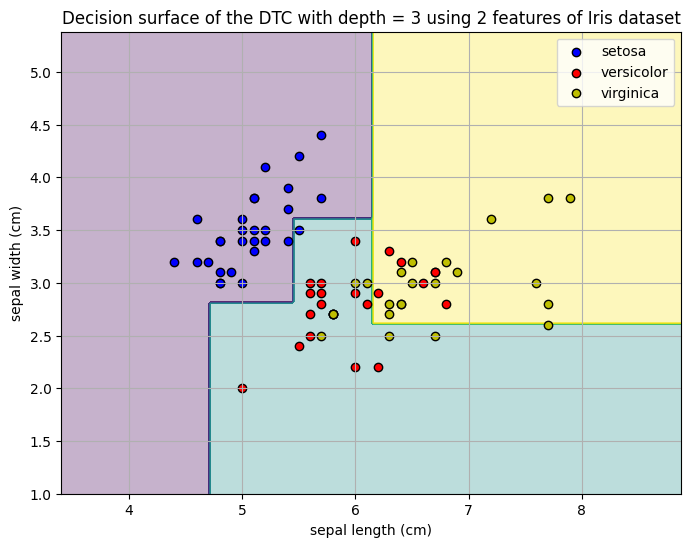


%--- End of Task 1 ---%





In [ ]:
#####---- Plot Decision Boundaries ----####
def plot_boundaries_DCT(model, results, XTrain, yTrain, XTest, yTest, featureNames, classNames):
    """
    Plots the decision boundary of a Decision Tree Classifier.
    Parameters:
    - model: Trained Decision Tree Classifier.
    - XTrain: Training feature dataset.
    - yTrain: Training target labels.
    - XTest: Test feature dataset.
    - yTest: Test target labels.
    - featureNames: Names of the features for labeling the axes.
    - classNames: Names of the target classes for labeling the legend.
    """
    # Automatically calculate parameters
    numClasses = len(np.unique(yTrain))  # Number of unique target classes
    plotColors = "bry"[:numClasses]  # Limit colors based on the number of classes
    plotStep = 0.02  # Step size for the mesh grid
    pair = [0, 1]  # Only plotting for the first two features
    depth = results['best_depth']

    # Create the decision boundary
    xMin, xMax = XTest[:, 0].min() - 1, XTest[:, 0].max() + 1
    yMin, yMax = XTest[:, 1].min() - 1, XTest[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(xMin, xMax, plotStep),
        np.arange(yMin, yMax, plotStep)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis', levels=100)

    # Scatter plot of the test data
    for i, color in zip(range(numClasses), plotColors):
        idx = np.where(yTest == i)
        plt.scatter(XTest[idx, 0], XTest[idx, 1], c=color, label=classNames[i], edgecolor="k")

    plt.xlabel(featureNames[pair[0]])
    plt.ylabel(featureNames[pair[1]])
    plt.title(f"Decision surface of the DTC with depth = {depth} using 2 features of Iris dataset")
    plt.legend()
    plt.grid()
    plt.show()

plot_boundaries_DCT(bestModel, results, XTrain, yTrain, XTest, yTest, featureNames, classNames)
print("\n%--- End of Task 1 ---%\n\n\n")

Με βάση το διάγραμμα των ορίων απόφασης που απεικονίζεται:

**Διαχωρισμός της κατηγορίας Setosa:**
Η κατηγορία Setosa (μπλε) είναι απολύτως διαχωρίσιμη από τις υπόλοιπες δύο κατηγορίες, γεγονός που δείχνει ότι το μοντέλο καταφέρνει να εντοπίσει αποτελεσματικά τα χαρακτηριστικά που την διαφοροποιούν από τις άλλες.

**Επικάλυψη των κατηγοριών Versicolor και Virginica:**
Παρατηρείται σημαντική επικάλυψη μεταξύ των κατηγοριών Versicolor (κόκκινη) και Virginica (κίτρινη). Αυτό υποδεικνύει ότι οι δύο κατηγορίες έχουν παρόμοιες τιμές για τα χαρακτηριστικά που χρησιμοποιήθηκαν (μήκος και πλάτος σεπάλων), με αποτέλεσμα την αυξημένη πιθανότητα λανθασμένων ταξινομήσεων μεταξύ τους.

**Απλοποιημένα Όρια Απόφασης:**
Το μοντέλο με μέγιστο βάθος 3 παράγει σχετικά απλοποιημένα όρια απόφασης, πράγμα που μειώνει την πιθανότητα υπερπροσαρμογής (overfitting), οδηγεί σε μέτρια απόδοση σε περιοχές όπου τα δεδομένα επικαλύπτονται.

**Χαρακτηριστικά που χρησιμοποιήθηκαν:**
Το μήκος και το πλάτος των σεπάλων, αν και παρέχουν αρκετές πληροφορίες για τον διαχωρισμό της Setosa, δεν επαρκούν για την αποτελεσματική διάκριση μεταξύ Versicolor και Virginica. Ίσως η χρήση περισσότερων χαρακτηριστικών να οδηγούσε σε καλύτερα αποτελέσματα.

Αξιολόγηση Βάθους Δέντρου:
Η επιλογή βάθους 3 διατήρησε ένα ικανοποιητικό επίπεδο ακρίβειας. Παρόλα αυτά,το 78.67% δείχνει ότι το μοντέλο έχει περιορισμούς, ειδικά στη διάκριση των δύο τελευταίων κατηγοριών.

Συμπερασματικά, το μοντέλο λειτουργεί καλά για την κατηγορία Setosa αλλά παρουσιάζει δυσκολίες στη διάκριση μεταξύ Versicolor και Virginica, γεγονός που υποδεικνύει την ανάγκη για βελτιώσεις στη μέθοδο ή την επιλογή χαρακτηριστικών.

### **Bonus: Grid Search για DCT**

Η συνάρτηση grid_search_DTC χρησιμοποιείται για την εύρεση των βέλτιστων υπερπαραμέτρων του Decision Tree Classifier μέσω της τεχνικής Grid Search. Ουσιαστικά, γίνεται μια προσπάθεια tuning αυξάνοντας τις υπερπαραμέτρους πέρα απο το βάθος του DTC.

Αρχικά, αν δεν παρέχεται συγκεκριμένο πλέγμα παραμέτρων, η συνάρτηση δημιουργεί ένα προκαθορισμένο πλέγμα που περιλαμβάνει διαφορετικές τιμές για :

*   **το κριτήριο διαχωρισμού** (gini ή entropy)
*  **το μέγιστο βάθος του δέντρου**,
*   **τον ελάχιστο αριθμό δειγμάτων που απαιτούνται για τη διάσπαση ενός κόμβου**
*    **τον ελάχιστο αριθμό δειγμάτων σε κάθε φύλλο**


Για την υλοποιήση χρησιμοποιήθηκε η έτοιμη GridSearchCV για να εξετάσει όλες τις πιθανές συνδυαστικές τιμές των υπερπαραμέτρων και cross-validation με σκοπό τη μέτρηση της ακρίβειας κάθε μοντέλου. Μετά την εκπαίδευση, επιλέγεται το καλύτερο μοντέλο με βάση τη μέγιστη ακρίβεια και επιστρέφονται οι καλύτερες υπερπαράμετροι, η ακρίβεια του μοντέλου κατά τη διάρκεια της εκπαίδευσης, καθώς και η ακρίβεια κατά τη δοκιμή στα δεδομένα test.

Τέλος, δημιουργείται ένα διάγραμμα που δείχνει την επίδραση του μέγιστου βάθους και του κριτηρίου διαχωρισμού στην ακρίβεια κατά το cv, διευκολύνοντας τη σύγκριση και την κατανόηση της συμπεριφοράς του μοντέλου.

In [ ]:
def grid_search_DTC(XTrain, XTest, yTrain, yTest, paramGrid=None):
    """
    Perform a grid search over Decision Tree hyperparameters and visualize results.

    Parameters:
    XTrain, XTest: Features for training and testing
    yTrain, yTest: Labels for training and testing
    paramGrid: Dictionary of hyperparameters for GridSearchCV

    Returns:
    - bestModel: The DecisionTreeClassifier with the best hyperparameters
    - bestParams: Dictionary of the best hyperparameters
    - bestAccuracy: Accuracy of the best model on the test set
    """

    # Default hyperparameter grid if none provided
    if paramGrid is None:
        paramGrid = {
            'criterion': ['gini', 'entropy'],           # Splitting criteria
            'max_depth': [2, 3, 4, 6, 8, 10],           # Tree depth
            'min_samples_split': [2, 5, 10],            # Min samples required to split a node
            'min_samples_leaf': [2, 4, 10]              # Min samples per leaf
        }

    # Initialize a DecisionTreeClassifier
    dt = DecisionTreeClassifier()

    # Perform Grid Search
    gridSearch = GridSearchCV(estimator=dt, param_grid=paramGrid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
    gridSearch.fit(XTrain, yTrain)

    # Get the best model and hyperparameters
    bestModel = gridSearch.best_estimator_
    bestParams = gridSearch.best_params_
    bestAccuracyTrain = gridSearch.best_score_  # Accuracy from cross-validation

    # Evaluate the best model on the test set
    yPred = bestModel.predict(XTest)
    bestAccuracyTest = accuracy_score(yTest, yPred)

    # Print results
    print("\nGrid Search Results:")
    print(f"Best Parameters: {bestParams}")
    print(f"Best Training Accuracy (CV): {bestAccuracyTrain:.4f}")
    print(f"Test Accuracy with Best Model: {bestAccuracyTest:.4f}")

    # Convert GridSearch results to a DataFrame for visualization
    resultsDf = pd.DataFrame(gridSearch.cv_results_)

    # Plot results for the mean_test_score against combinations of hyperparameters
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=resultsDf,
        x="param_max_depth",
        y="mean_test_score",
        hue="param_criterion",
        marker="o"
    )
    plt.title("Cross-Validation Accuracy vs. Tree Depth by Criterion")
    plt.xlabel("Max Depth")
    plt.ylabel("Mean CV Accuracy")
    plt.legend(title="Criterion")
    plt.grid()
    plt.show()

    return bestModel, bestParams, bestAccuracyTest

**Αποτελέσματα Grid Search**

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Grid Search Results:
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Training Accuracy (CV): 0.7333
Test Accuracy with Best Model: 0.7600


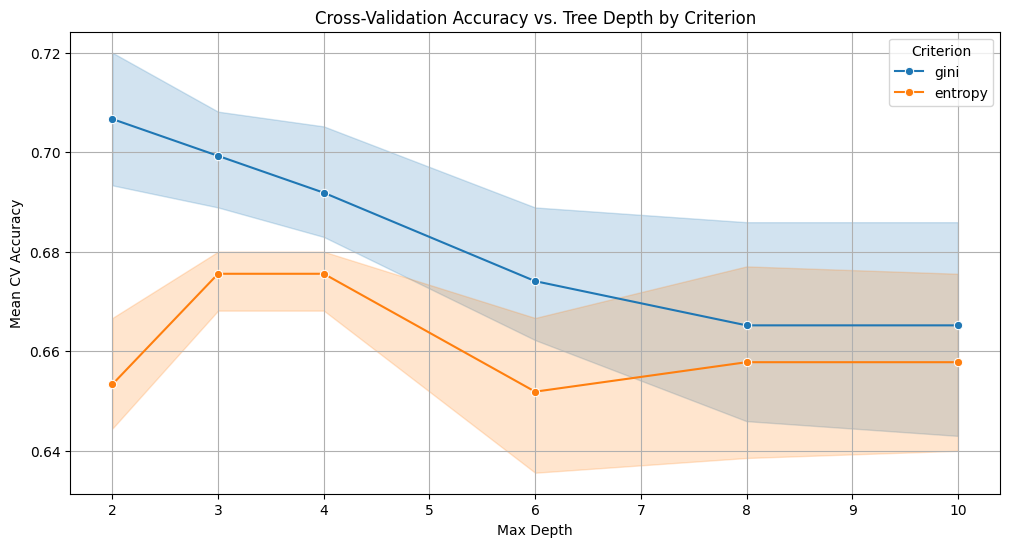

              precision    recall  f1-score   support

      setosa       0.96      0.93      0.95        29
  versicolor       0.60      0.65      0.62        23
   virginica       0.68      0.65      0.67        23

    accuracy                           0.76        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.77      0.76      0.76        75



<Figure size 800x600 with 0 Axes>

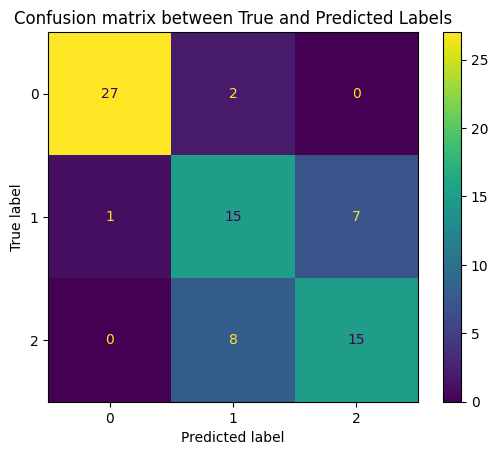


Best Model: DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10)
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
Test Accuracy: 0.7600


In [ ]:
# Perform Grid Search with Plot
bestModel, bestParams, bestAccuracy = grid_search_DTC(XTrain, XTest, yTrain, yTest)

# Use the tree to make the classification on the test set
yPred = bestModel.predict(XTest)
# Classification report
print(sklearn.metrics.classification_report(yTest, yPred, target_names=iris.target_names))

# Calculate Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(yTest, yPred)
plt.title("Confusion matrix between True and Predicted Labels")
plt.show()

# Results
print(f"\nBest Model: {bestModel}")
print(f"Best Parameters: {bestParams}")
print(f"Test Accuracy: {bestAccuracy:.4f}")

Παρατηρείται ότι δεν έχει αλλάξει κατι προς το καλύτερο κάτι που ήταν αναμενόμενο.

## **Part 2**

Η ενότητα αυτή περιλαμβάνει την ανάπτυξη και εφαρμογή μιας προσαρμοσμένης υλοποίησης του **τυχαίου δάσους (Random Forest Classifier)**, η οποία χρησιμοποιεί τη μέθοδο bootstrap για επαναδειγματοληψία των δεδομένων και συνδυάζει τις προβλέψεις μέσω ψηφοφορίας πλειοψηφίας. Η διαδικασία υλοποιείται μέσω δύο βασικών συναρτήσεων και της κλάσης **myRandomForestClassifier**.

### **Κλάση myRandomForestClassifier**

**Συνάρτηση bootstrapMethod()**

Αρχικά, η συνάρτηση εφαρμόζει τη μέθοδο bootstrap για επαναδειγματοληψία. Επαναδειγματοληψίες των δεδομένων δημιουργούνται χρησιμοποιώντας τυχαίους δείκτες με αντικατάσταση, βασιζόμενοι στο ποσοστό των δεδομένων που ορίζεται από την παράμετρο gamma. Επιστρέφει υποσύνολα δεδομένων (features και labels) τα οποία θα χρησιμοποιηθούν για την εκπαίδευση των δέντρων.

**myRandomForestClassifier**

Η κλάση αυτή είναι μια προσαρμοσμένη υλοποίηση ενός ταξινομητή τυχαίου δάσους (Random Forest), η οποία περιλαμβάνει δύο κύριες συναρτήσεις, τη συνάρτηση fit για την εκπαίδευση και την predict για την πρόβλεψη. Κατά την αρχικοποίηση, ορίζεται ο αριθμός των δέντρων, το ποσοστό των δεδομένων που θα χρησιμοποιείται σε κάθε επαναδειγματοληψία (bootstrap), ο ελάχιστος αριθμός δειγμάτων που απαιτούνται για να γίνει διαχωρισμός σε έναν κόμβο και το μέγιστο βάθος των DTC.

Η συνάρτηση **fit** εκπαιδεύει το μοντέλο δημιουργώντας διαδοχικά δέντρα απόφασης. Για κάθε δέντρο, εφαρμόζεται η συνάρτηση bootstrap για τη δημιουργία υποσυνόλων δεδομένων από τα αρχικά δεδομένα εκπαίδευσης. Στη συνέχεια, κάθε δέντρο εκπαιδεύεται στα υποσύνολα αυτά με βάση τις προκαθορισμένες παραμέτρους και αποθηκεύεται στη λίστα forest. Με τον τρόπο αυτό, δημιουργείται ένα σύνολο δέντρων που έχουν εκπαιδευτεί σε διαφορετικά δείγματα δεδομένων.

Η συνάρτηση **predict** χρησιμοποιεί το εκπαιδευμένο δάσος για να προβλέψει τις ετικέτες για ένα νέο σύνολο δεδομένων. Κάθε δέντρο απόφασης στο δάσος προβλέπει την ετικέτα για κάθε δείγμα. Οι προβλέψεις από όλα τα δέντρα συνδυάζονται μέσω ψηφοφορίας πλειοψηφίας για να καθοριστεί η τελική πρόβλεψη.

In [ ]:
#### ---- Task 2 of the 3rd Part ---- ####

# Sampling with bootstrap method
def bootstrapMethod(X, y, gamma = 0.5, numSamples=100):
    XBootSamples = []
    yBootSamples = []
    sampleSize = np.floor(gamma * len(X))
    sampleSize = sampleSize.astype(int)
    randomIndices = np.random.choice(sampleSize, sampleSize, replace=True)
    XBootSamples = X[randomIndices]
    yBootSamples = y[randomIndices]
    return XBootSamples, yBootSamples


def mostCommonTarget(y):
    y_counter = Counter(y)
    return y_counter.most_common(1)[0][0]

class myRandomForestClassifier:
    def __init__(self, numTrees=100, gamma=0.5, min_samples_split=10, max_depth=11, random_state=None):
        self.numTrees = numTrees
        self.gamma = gamma
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.random_state = random_state
        self.forest = []  # Store trained trees

    def fit(self, X, y):
        np.random.seed(self.random_state)  # Ensure reproducibility if random_state is set

        for _ in range(self.numTrees):
            # Use bootstrap Method for resampling
            XBootSamples, yBootSamples = bootstrapMethod(X, y, gamma=self.gamma)
            # Train a decision tree
            DTClassifier = DecisionTreeClassifier(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                random_state=self.random_state
            )
            DTClassifier.fit(XBootSamples, yBootSamples)
            self.forest.append(DTClassifier)

    def predict(self, X):
        # Collect predictions from all trees
        allDTCPredictions = np.array([tree.predict(X) for tree in self.forest])

        # Majority vote using the provided mostCommonTarget function
        allDTCPredictions = np.swapaxes(allDTCPredictions, 0, 1)  # Transpose to align predictions for each sample
        yPred = [mostCommonTarget(allDTCPredictions) for allDTCPredictions in allDTCPredictions]
        return np.array(yPred)


### **Ανάλυση και Βελτιστοποίηση Βάθους για Ταξινομητή Random Forest**

Η συνάρτηση **tuning_depth_RFC** χρησιμοποιείται για την ανάλυση της απόδοσης του myRandomForestClassifier για διαφορετικά βάθη DTC. Οι παράμετροι εισόδου περιλαμβάνουν τα σύνολα δεδομένων εκπαίδευσης και δοκιμής **(XTrain, XTest, yTrain, yTest)**, το μέγιστο βάθος δέντρων (**maxDepth**) και το ποσοστό των χαρακτηριστικών που χρησιμοποιούνται κατά τη διαδικασία επαναδειγματοληψίας (**gamma**). Η συνάρτηση επιστρέφει το μοντέλο με το καλύτερο βάθος, ένα dictionary αποτελεσματων, και τις προβλέψεις του καλύτερου μοντέλου.

Η διαδικασία ξεκινά με την εκπαίδευση διαδοχικών μοντέλων τυχαίου δάσους για διαφορετικές τιμές μέγιστου βάθους, από 1 μέχρι το καθορισμένο maxDepth.  Η ακρίβεια των προβλέψεων υπολογίζεται και αποθηκεύεται τόσο σε απόλυτες τιμές όσο και σε ποσοστά.

Μόλις ολοκληρωθεί η εκπαίδευση για όλα τα βάθη, η συνάρτηση εντοπίζει το βέλτιστο βάθος του δάσους, δηλαδή εκείνο που παρέχει την υψηλότερη ακρίβεια. Τα αποτελέσματα παρουσιάζονται οπτικά μέσω ενός διαγράμματος, όπου η ακρίβεια απεικονίζεται σε συνάρτηση με το μέγιστο βάθος των δέντρων, ενώ σημειώνεται και η καλύτερη τιμή βάθους.

In [ ]:
def tuning_depth_RFC(XTrain, XTest, yTrain, yTest, maxDepth=None, gamma=0.5):
    """
    Analyze Random Forest Classifier with varying depths using myRandomForestClassifier.
    Parameters:
    XTrain, XTest: Features for training and testing
    yTrain, yTest: Labels for training and testing
    maxDepth: Maximum depth for the Random Forest
    gamma: Max features parameter for Random Forest
    Returns:
    - bestModel: The myRandomForestClassifier with the best depth
    - results: Dictionary containing details about depths, accuracy scores, and the best depth
    """
    # Initialize variables
    depths = list(range(1, maxDepth + 1))
    accScoresRF = np.zeros((maxDepth + 1, 1))  # Raw accuracy scores
    accScoresRFperc = np.zeros((maxDepth + 1, 1))  # Accuracy as percentages
    RFCModels = []  # List to store trained Random Forest models

    # Loop through all depths to train and evaluate models
    for i in depths:
        # Use myRandomForestClassifier instead of RandomForestClassifier
        RFC = myRandomForestClassifier(numTrees=100, gamma=gamma, max_depth=i)
        RFC.fit(XTrain, yTrain)
        predictions = RFC.predict(XTest)
        RFCModels.append(RFC)

        # Calculate accuracy for the current model
        accScoresRF[i] = accuracy_score(y_true=yTest, y_pred=predictions)
        accScoresRFperc[i] = accScoresRF[i] * 100  # Convert to percentage

    # Round the accuracy scores for better readability
    accScoresRFperc = np.round(accScoresRFperc, 4)

    # Find the best depth and corresponding accuracy score
    bestAccuracyIndex = np.argmax(accScoresRFperc) # Skip index 0
    bestDepth = depths[bestAccuracyIndex]-1
    bestAccuracyValue = (accScoresRFperc[bestAccuracyIndex]).astype(float)

    # Print results
    print(f"All Accuracy Scores (percentages): {accScoresRFperc[1:, 0]}")  # Skip depth=0
    print(f"Most efficient depth of tree: {bestDepth}")
    print(f"Accuracy at best depth: {bestAccuracyValue.item()}%\n")

    # Plot Accuracy Scores vs. Depth
    plt.figure(figsize=(10, 6))
    plt.plot(depths, accScoresRFperc[1:], marker='o', color='b', label="Accuracy (%)")
    plt.axvline(x=bestDepth, color='r', linestyle='--', label=f"Best Depth: {bestDepth}")
    plt.xlabel("Tree Depth")
    plt.ylabel("Accuracy (%)")
    plt.title("Random Forest Accuracy vs Depth")
    plt.legend()
    plt.grid()
    plt.show()

    # Return the best model and results as a dictionary
    results = {
        "depths": depths[1:],  # Exclude depth=0
        "accuracy_scores_percentage": accScoresRFperc[1:],
        "best_depth": bestDepth,
        "best_accuracy": bestAccuracyValue,
    }
    bestModel = RFCModels[bestAccuracyIndex - 1]  # Use the model corresponding to the best depth
    return bestModel, results,predictions

All Accuracy Scores (percentages): [70.6667 76.     74.6667 73.3333 73.3333 72.     70.6667 72.     72.
 73.3333 72.    ]
Most efficient depth of tree: 2
Accuracy at best depth: 76.0%



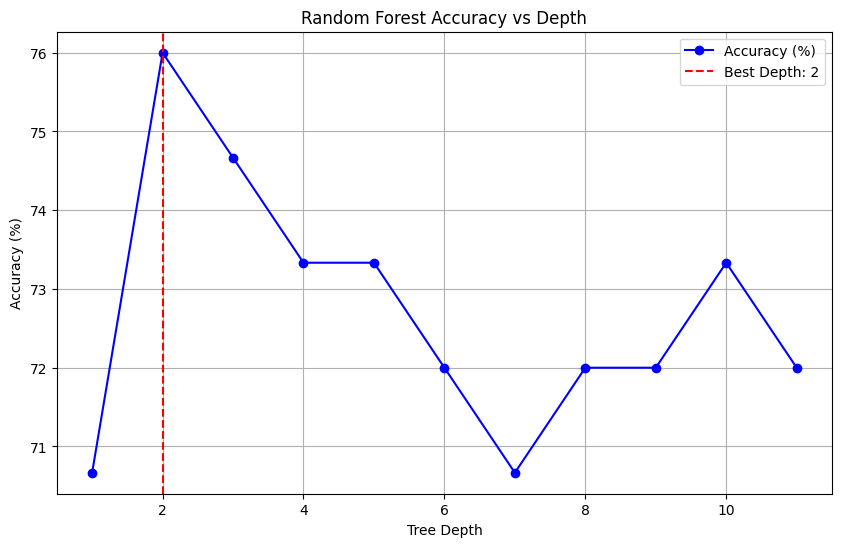

In [ ]:
# Call the tuning RFC function with gamma set to 0.5
bestModelRFC, RFCresults,yPredictions = tuning_depth_RFC(
    XTrain=XTrain, XTest=XTest,
    yTrain=yTrain, yTest=yTest, maxDepth = 11)

### **Απεικόνιση των ορίων απόφασης του ταξινομητή Random Forest**

Η συνάρτηση **plot_boundaries_RFC**  όπως και η προηγούμενη για τον DTC δημιουργεί το διάγραμμα των ορίων απόφασης ενός **Random Forest Classifier (RFC)**. Στόχος της είναι η οπτικοποίηση της λειτουργίας του RFC και των αποφάσεων που λαμβάνονται με βάση τα δεδομένα εκπαίδευσης. Η συνάρτηση αρχικά λαμβάνει ως παραμέτρους το μέγιστο βάθος του μοντέλου, τις προβλέψεις, τα δεδομένα εκπαίδευσης, τα ονόματα των χαρακτηριστικών και των κλάσεων, καθώς και τον αριθμό μέγιστων χαρακτηριστικών που χρησιμοποιεί το RFC.

Ξεκινώντας, υπολογίζει  τον αριθμό των μοναδικών κλάσεων. Στη συνέχεια, εκπαιδεύει το RFC με τις συγκεκριμένες παραμέτρους και περιορίζει τα δεδομένα στις δύο πρώτες διαστάσεις ώστε να είναι δυνατή η δισδιάστατη οπτικοποίηση. Μετά την εκπαίδευση, η συνάρτηση δημιουργεί ένα πλέγμα σημείων στον χώρο χαρακτηριστικών και προβλέπει την κλάση για κάθε σημείο, δημιουργώντας με αυτόν τον τρόπο το διάγραμμα των ορίων απόφασης.


In [ ]:
def plot_boundaries_RFC(modelDepth, predictions, XTrain, yTrain, featureNames, classNames, maxFeatures):
    """
    Plots the decision boundary of a Random Forest Classifier.
    Parameters:
    - modelDepth: Maximum depth of the Random Forest.
    - predictions: Precomputed predictions for different depths.
    - XTrain: Training feature dataset.
    - yTrain: Training target labels.
    - featureNames: Names of the features for labeling the axes.
    - classNames: Names of the target classes for labeling the legend.
    - maxFeatures: Max features parameter for the Random Forest.
    """
    # Automatically calculate parameters
    numClasses = len(np.unique(yTrain))  # Number of unique target classes
    plotColors = "bry"[:numClasses]  # Limit colors based on the number of classes
    plotStep = 0.02  # Step size for the mesh grid
    pair = [0, 1]  # Only plotting for the first two features

    # Train the Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, max_depth=modelDepth, max_features=maxFeatures, bootstrap=True)
    model.fit(XTrain, yTrain)

    # Create the decision boundary
    xMin, xMax = XTrain[:, 0].min() - 1, XTrain[:, 0].max() + 1
    yMin, yMax = XTrain[:, 1].min() - 1, XTrain[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(xMin, xMax, plotStep),
        np.arange(yMin, yMax, plotStep)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis', levels=100)

    # Scatter plot of the training data
    for i, color in zip(range(numClasses), plotColors):
        idx = np.where(yTrain == i)
        plt.scatter(XTrain[idx, 0], XTrain[idx, 1], c=color, label=classNames[i], edgecolor="k")

    plt.xlabel(featureNames[pair[0]])
    plt.ylabel(featureNames[pair[1]])
    plt.title(f"Decision surface of the RFC with depth = {modelDepth} using 2 features of Iris dataset")
    plt.legend()
    plt.grid()
    plt.show()

### **Οπτικοποίηση Αποτελεσμάτων**

 Αρχικά, προσδιορίζεται το βέλτιστο βάθος του μοντέλου, όπως έχει υπολογιστεί από προηγούμενη ανάλυση, και η συνάρτηση **plot_boundaries_RFC** καλείται για να δημιουργήσει τα όρια απόφασης στο σύνολο εκπαίδευσης.Στη συνέχεια, πραγματοποιείται οπτικοποίηση ενός μεμονωμένου δέντρου από το σύνολο δέντρων του Random Forest.

Τα αποτελέσματα επισυνάπτονται του classification report, η οποία περιλαμβάνει μέτρα όπως precision, recall και f1-score για κάθε κλάση. Επιπλέον, υπολογίζεται και προβάλλεται ο confusion matrix, ο οποίος δείχνει τις ακριβείς και λανθασμένες προβλέψεις του μοντέλου για κάθε κλάση.

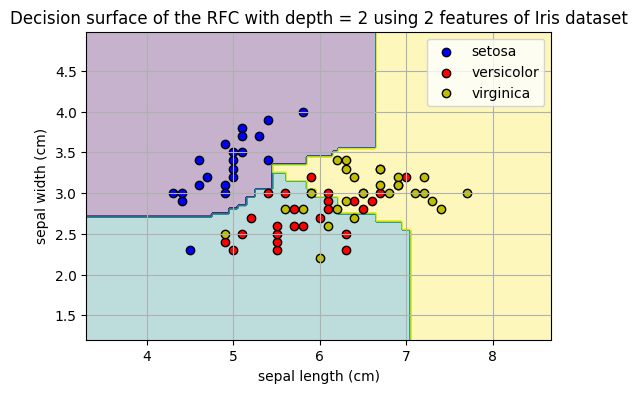

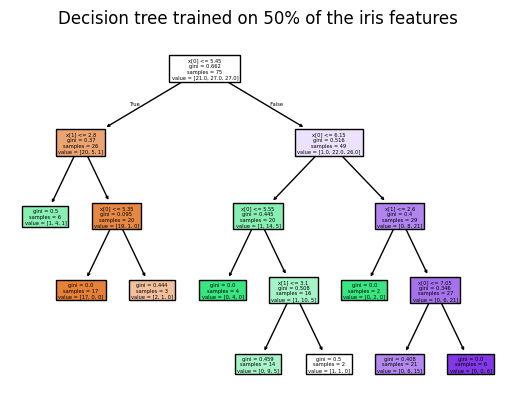

              precision    recall  f1-score   support

      setosa       1.00      0.86      0.93        29
  versicolor       0.63      0.52      0.57        23
   virginica       0.65      0.87      0.74        23

    accuracy                           0.76        75
   macro avg       0.76      0.75      0.75        75
weighted avg       0.78      0.76      0.76        75



<Figure size 800x600 with 0 Axes>

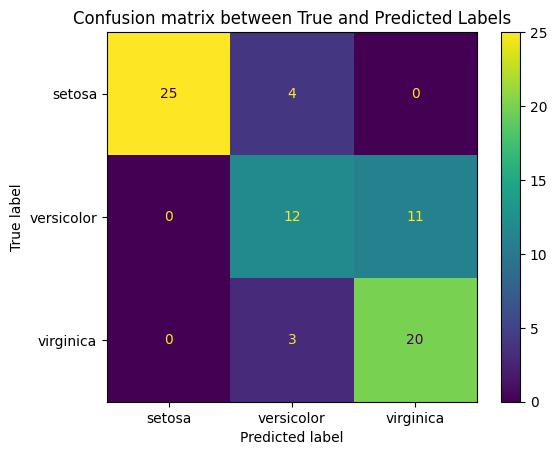

In [ ]:
# Define model depth
modelDepth = RFCresults['best_depth']
gamma = 0.5
# Call the function
plot_boundaries_RFC(modelDepth, yPredictions, XTrain, yTrain, featureNames, classNames, maxFeatures=gamma)


# # Vizualize the tree
plt.figure()
tree.plot_tree(bestModel, filled=True)
plt.title("Decision tree trained on 50% of the iris features")
plt.show()

# Use the tree to make the classification on the test set
yPredictions = bestModelRFC.predict(XTest)
# Classification report
print(sklearn.metrics.classification_report(yTest, yPredictions, target_names=iris.target_names))

# Calculate Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(yTest, yPredictions, display_labels=classNames)
plt.title("Confusion matrix between True and Predicted Labels")
plt.show()

### **Συμπεράσματα**

**Όρια απόφασης του Random Forest Classifier:**

*    Ο αλγόριθμος διαχωρίζει τις τρεις κατηγορίες (Setosa, Versicolor, Virginica) στον χώρο των δύο χαρακτηριστικών (sepal length και sepal width).

*  Ο διαχωρισμός για την κατηγορία Setosa είναι ξεκάθαρος και καλά ορισμένος, κάτι που συμφωνεί με την ακρίβεια της κατηγορίας (precision = 1.00).

*   Οι κατηγορίες Versicolor και Virginica εμφανίζουν μεγαλύτερη επικάλυψη. Στο όριο μεταξύ αυτών των δύο κατηγοριών, διακρίνονται πιο σύνθετες γραμμές διαχωρισμού, που δείχνουν ότι το μοντέλο παλεύει να διαχωρίσει τα δεδομένα. Ωστόσο, ίσως υπάρχει και μεγαλύτερος κίνδυνος για εμφάνιση overfitting.

**Confusion Matrix:**

*   Η Setosa προβλέπεται σχεδόν τέλεια (25 σωστές προβλέψεις και μόνο 4 λάθη).
*  Η Versicolor εμφανίζει μεγαλύτερα προβλήματα ταξινόμησης. Ειδικότερα, υπάρχουν 10 δείγματα Versicolor που ταξινομήθηκαν λανθασμένα ως Virginica.
*   Η Virginica έχει 3 δείγματα που ταξινομήθηκαν λανθασμένα ως Versicolor.


**Classification Report:**

**Setosa:** Ο αλγόριθμος αποδίδει εξαιρετικά καλά με απόλυτη ακρίβεια (precision = 1.00) για την κατηγορία Setosa, ενώ το recall είναι 0.86. Αυτό σημαίνει ότι όλα τα παραδείγματα που προβλέφθηκαν ως Setosa είναι σωστά, αλλά χάθηκαν ορισμένα παραδείγματα πραγματικής Setosa που ταξινομήθηκαν λανθασμένα. Η f1-score, που συνδυάζει precision και recall, είναι υψηλή στο 0.93.

**Versicolor:** Το precision για την κατηγορία Versicolor είναι 0.72, που δείχνει ότι αρκετές προβλέψεις για Versicolor ήταν σωστές. Το recall είναι χαμηλότερο, στο 0.57, που σημαίνει ότι ορισμένα πραγματικά παραδείγματα Versicolor ταξινομήθηκαν λανθασμένα. Η f1-score είναι 0.63, υποδεικνύοντας μέτρια απόδοση για αυτή την κατηγορία.

**Virginica:** Το precision για την κατηγορία Virginica είναι 0.62, ενώ το recall είναι υψηλότερο, στο 0.87. Αυτό δείχνει ότι αν και πολλές προβλέψεις Virginica ήταν λανθασμένες, ο αλγόριθμος αναγνώρισε σωστά τα περισσότερα πραγματικά παραδείγματα αυτής της κατηγορίας. Η f1-score είναι 0.73.

**Συνολική Απόδοση:**

Η συνολική ακρίβεια (accuracy) του μοντέλου είναι 0.77 (77%), κάτι που δείχνει ότι το μοντέλο αποδίδει καλά, αλλά υπάρχουν περιθώρια βελτίωσης. Ο μέσος όρος precision, recall και f1-score (macro avg) είναι περίπου 0.78, 0.77 και 0.76 αντίστοιχα.

### **Μελέτη της επιρροής του συντελεστή γ την ποιότητα και την απόδοση του αλγορίθμου**

Επιλέχτηκε ως παράδειγμα να δοκιμαστεί ο ταξινομητής Random Forest με:

*   Συγκεκριμένο βάθος, το οποίο επιλέχθηκε να είναι το καλύτερο βάθος που υπολογίστηκε στα παραπάνω ερωτήματα
*    Σε ένας εύρος από 10% μέχρι 100% με αυξητικό βήμα 10% κατά επανάληψη

Ο παρακάτω κώδικας αξιολογεί την απόδοση του αλγορίθμου myRandomForestClassifier για διαφορετικές τιμές της παραμέτρου γ, η οποία ελέγχει τη μέγιστη ποσότητα του dataset που χρησιμοποιείται στη δημιουργία του κάθε δέντρου. Πιο συγκεκριμένα, ο αλγόριθμος δοκιμάζει για τις 10 διαφορετικές τιμές για και αποθηκεύει την ακρίβεια του μοντέλου για κάθε τιμή.Μετά τον υπολογισμό της, βρίσκει την τιμή του γ που επιτυγχάνει την υψηλότερη ακρίβεια, καθώς και την αντίστοιχη τιμή της.


In [ ]:
topDepth =2
gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

accuracyRandForestGamma = np.zeros((len(gammas),1))
for i in range(0, len(gammas)):
    clf = myRandomForestClassifier(numTrees = 100, gamma = gammas[i], max_depth = 2)
    clf.fit(XTrain, yTrain)
    prediction = clf.predict(XTest)
    accuracyRandForestGamma[i] = accuracy_score(y_true=yTest, y_pred=prediction)

accuracyRandForestGamma = np.round(accuracyRandForestGamma * 100, 3)
print(f"All the accuracy scores are: {accuracyRandForestGamma[:,0]}")
topAccuracyIndex= np.argmax(accuracyRandForestGamma)
topAccuracy = accuracyRandForestGamma[topAccuracyIndex, 0]
topGamma = gammas[topAccuracyIndex]
print(f"Most efficient gamma parameter equals to {topGamma} by achieving accuracy score percentage of {topAccuracy}")

All the accuracy scores are: [30.667 62.667 80.    76.    76.    76.    77.333 76.    77.333 78.667]
Most efficient gamma parameter equals to 0.3 by achieving accuracy score percentage of 80.0


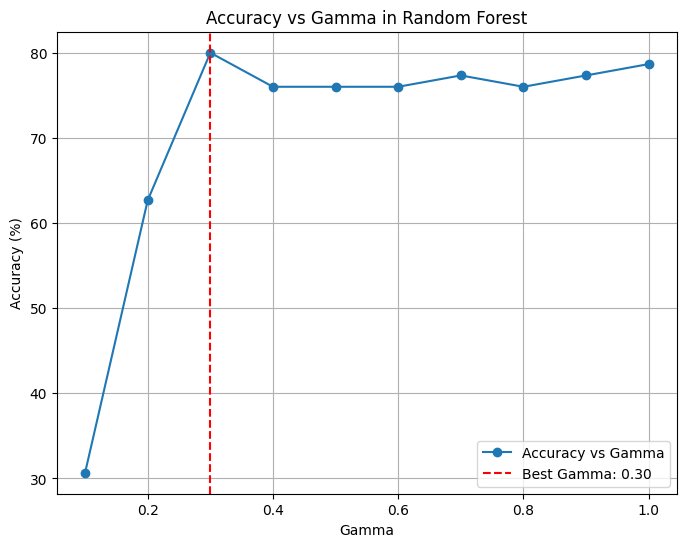

In [ ]:
# Plot accuracy vs gamma
plt.figure(figsize=(8, 6))
plt.plot(gammas, accuracyRandForestGamma, marker='o', label="Accuracy vs Gamma")
plt.axvline(topGamma, color='r', linestyle='--', label=f"Best Gamma: {topGamma:.2f}")
plt.xlabel("Gamma")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Gamma in Random Forest")
plt.legend()
plt.grid()
plt.show()

Το διάγραμμα δείχνει ότι η μέγιστη ακρίβεια επιτυγχάνεται όταν το  γ είναι 0.3. Η ακρίβεια αυξάνεται αρχικά καθώς το γ μεγαλώνει, αλλά οταν το γ=0.3 και μετά, η απόδοση αρχίζει να σταθεροποιείται και παρουσιάζει μικρές διακυμάνσεις. Αυτό δείχνει ότι η υπερβολική ή πολύ μικρή δειγματοληψία μπορεί να επηρεάσει αρνητικά την ικανότητα γενίκευσης του ταξινομητή.

Όταν το γ είναι πολύ μικρό, ο ταξινομητής δεν χρησιμοποιεί αρκετά δεδομένα για κάθε δέντρο, με αποτέλεσμα κακή απόδοση. Από την άλλη, για τιμές  γ μεγαλύτερες του 0.30, η αύξηση της δειγματοληψίας δεν προσφέρει περαιτέρω βελτίωση, καθώς τα δέντρα αρχίζουν να μοιάζουν περισσότερο μεταξύ τους λόγω της επικάλυψης των δειγμάτων. Σε σύγκριση με τον απλό ταξινομητή Decision Tree της πρώτης ενότητας, το Random Forest παρουσιάζει καλύτερη απόδοση και  μειώνει το φαινόμενο του overfitting μέσω της του bootstrap sampling.

## **Bonus: Grid Search για Random Forest με περισσότερες υπερπαραμέτρους**

Η παρακάτω ανάλυση ουσιαστικά είναι η ίδια με την ενότητα Part 2 για το δεύτερο μέρος της εργασίας C. Σε αυτήν την περίπτωση χρησιμοποιούνται έτοιμες συναρτήσεις από την sklearn όπως η GridSearchCV και η RandomForestClassifier, κυρίως για να συγκριθούν με τα αποτελέσματα των δικών μας implementations.

Η συνάρτηση tune_RFCmodel_GridSearchCV έχει ως στόχο να βελτιώσει τις επιδόσεις ενός ταξινομητή μέσω της ρύθμισης υπερπαραμέτρων χρησιμοποιώντας την συνάρτηση GridSearchCV από τη βιβλιοθήκη scikit-learn. Ο ταξινομητής εκπαιδεύεται και αξιολογείται με βάση έναν προκαθορισμένο πίνακα παραμέτρων εισόδου.

Τα δεδομένα εκπαίδευσης και αξιολόγησης χωρίζονται σε XTrain, XTest  και yTrain, yTest, ενώ χρησιμοποιείται η μέθοδος StratifiedKFold για cross validation. Η GridSearchCV αναζητεί όλες τις πιθανές τιμές των υπερπαραμέτρων, εκπαιδεύει το μοντέλο και αξιολογεί την απόδοσή του. Στη συνέχεια, βρίσκει τις βέλτιστες υπερπαραμέτρους και επιστρέφει το καλύτερο μοντέλο, την ακρίβειά του στο σύνολο αξιολόγησης, καθώς και τα αποτελέσματα της αναζήτησης για περαιτέρω ανάλυση.

Η συνάρτηση εκτυπώνει τις βέλτιστες υπερπαραμέτρους,το classification report για την απόδοση του μοντέλου στο σύνολο δοκιμής και τον confusion matrix.Γενικά, η συνάρτηση εξετάζει τις βέλτιστες υπερπαραμέτρους του μοντέλου Random Forest.

In [ ]:
# Function to tune the model using GridSearchCV
def tune_RFCmodel_GridSearchCV(model, paramGrid, XTrain, XTest, yTrain, yTest, scoring='accuracy', cv_folds=5):
    """
    Parameters:
    - model: The machine learning model to be tuned.
    - paramGrid: Dictionary containing the hyperparameters to tune.
    - XTrain, XTest: Features for training and testing.
    - yTrain, yTest: Labels for training and testing.
    - scoring: Scoring metric for evaluation (default is 'accuracy').
    - cv_folds: Number of cross-validation folds (default is 5).

    Returns:
    - bestAccuracy: Accuracy of the best model on the test set.
    - bestModel: The model with the best hyperparameters.
    - gridSearchResults: The full GridSearchCV results for further analysis.
    """
    print("Starting hyperparameter tuning...\n")

    # Set up StratifiedKFold for better performance on imbalanced data
    stratifiedCV = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Initialize GridSearchCV
    gridSearch = GridSearchCV(
        estimator=model, param_grid=paramGrid,
        scoring=scoring, cv=stratifiedCV,
        n_jobs=-1, verbose=1)

    # Fit the model and find the best parameters
    gridSearch.fit(XTrain, yTrain)
    bestModel = gridSearch.best_estimator_
    yPred = bestModel.predict(XTest)
    bestAccuracy = accuracy_score(yTest, yPred)

    # Display results
    print("\nBest Hyperparameters Found:")
    print(gridSearch.best_params_)
    print("\nClassification Report on Test Data:")
    print(classification_report(yTest, yPred))

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(bestModel, XTest, yTest, display_labels=classNames, cmap='viridis',)
    plt.title("Confusion Matrix")
    plt.show()

    return bestAccuracy, bestModel, gridSearch.cv_results_, gridSearch.best_params_, yPred

Παρακατώ, δημιουργείται ένα σύνολο υπερπαραμέτρων που περιέχει διαφορετικές τιμές για το μέγιστο βάθος του δέντρου (max_depth), τον αριθμό των δέντρων (n_estimators), τη στρατηγική επιλογής χαρακτηριστικών (max_features), το ελάχιστο πλήθος δειγμάτων για τον διαχωρισμό κόμβων (min_samples_split) και το ελάχιστο πλήθος δειγμάτων για τη δημιουργία φύλλων (min_samples_leaf).

Ο ταξινομητής Random Forest ορίζεται με την παράμετρο bootstrap=True, που σημαίνει ότι χρησιμοποιείται δειγματοληψία με αντικατάσταση για τη δημιουργία υποσυνόλων δεδομένων κατά την εκπαίδευση. Η επιλογή max_samples=0.5 περιορίζει κάθε δέντρο να χρησιμοποιεί το 50% των δεδομένων εκπαίδευσης.

Στη συνέχεια, το καλύτερο μοντέλο επιστρέφεται από τη συνάρτηση, μαζί με την ακρίβεια (bestAccuracy) που επιτυγχάνεται στο σύνολο δοκιμής.

Starting hyperparameter tuning...

Fitting 5 folds for each of 336 candidates, totalling 1680 fits

Best Hyperparameters Found:
{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.71      0.65      0.68        23
           2       0.68      0.74      0.71        23

    accuracy                           0.81        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.81      0.81      0.81        75



<Figure size 800x600 with 0 Axes>

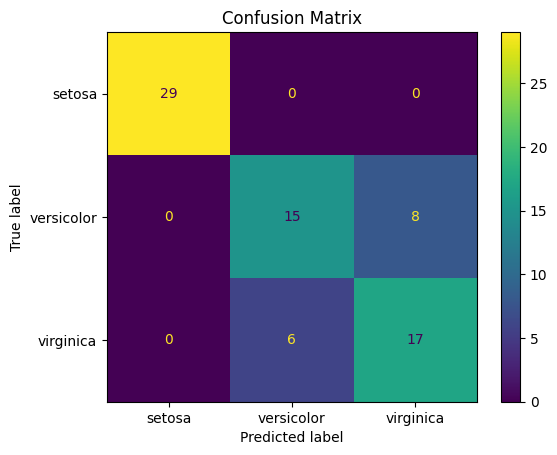


Highest accuracy after advanced tuning: 0.81


In [ ]:
paramGrid = {
    'max_depth': np.arange(1, 15),  # Explore a wider range of depths
    'n_estimators': [100, 200],  # Experiment with different numbers of trees
    'max_features': ['sqrt', 'log2', None],  # Try different feature selection strategies
    'min_samples_split': [2, 5],  # Control tree splitting
    'min_samples_leaf': [2, 4],  # Control leaf node size
}

randomForest = RandomForestClassifier(random_state=42, bootstrap=True, max_samples=0.5)
bestAccuracy, bestModel, gridResults, gridParams, yPred = tune_RFCmodel_GridSearchCV(
    randomForest, paramGrid, XTrain, XTest, yTrain, yTest, scoring='accuracy', cv_folds=5
)

# Print the results
print(f"\nHighest accuracy after advanced tuning: {bestAccuracy:.2f}")

Από το grid search προκυπτει ότι για τη βελτιστοποίηση του Random Forest ταξινομητή με τελική ακρίβεια 81% στο σύνολο δοκιμής, οι βέλτιστες υπερπαράμετροι που προέκυψαν είναι οι εξής: μέγιστο βάθος δέντρου max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators =100.

Η αναφορά ταξινόμησης δείχνει εξαιρετική απόδοση για την κατηγορία "setosa" με ακρίβεια, ανάκληση και f1-score 1.00. Οι κατηγορίες "versicolor" και "virginica" είχαν χαμηλότερες επιδόσεις με f1-scores 0.68 και 0.71, αντίστοιχα.

Ο confusion matrix επιβεβαιώνει την ακρίβεια του μοντέλου για την "setosa", ενώ παρατηρούνται ορισμένα σφάλματα ταξινόμησης μεταξύ των "versicolor" και "virginica", γεγονός που όπως ανεφερθηκε και πριν δειχει ότι τα χαρακτηριστικά τους ενδέχεται να επικαλύπτονται.

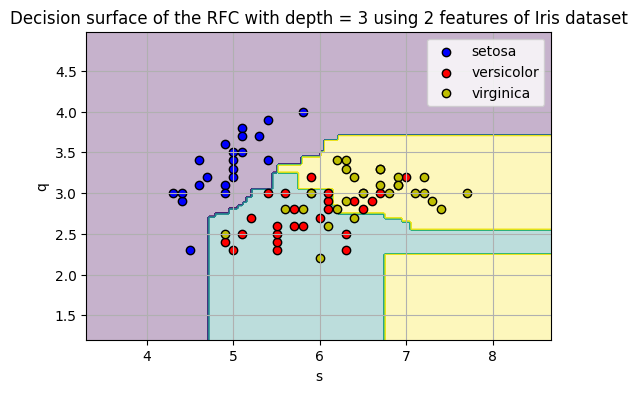

In [ ]:
modelDepth = gridParams['max_depth']
yPredictions = yPred
featureNames = gridParams['max_features']

# Plot boundaries of the optimal Model
plot_boundaries_RFC(modelDepth, yPredictions, XTrain, yTrain, featureNames, classNames, maxFeatures=gamma)


Από το σχήμα προκύπτει ότι το Random Forest με μέγιστο βάθος δέντρου 3 προσαρμόζει καλύτερα τα όρια απόφασης στα δεδομένα, δημιουργώντας πιο περίπλοκες και ακριβείς γραμμές απόφασης συγκριτικά με το απλό DTC. Αυτό εξηγεί το υψηλότερο ποσοστό σωστής ταξινόμησης που καταγράφηκε στη συγκεκριμένη περίπτωση.

Παρόλα αυτά, παρατηρείται ότι η μεγαλύτερη προσαρμογή του μοντέλου στα δεδομένα ενδέχεται να αυξήσει τον κίνδυνο υπερπροσαρμογής (overfitting), ιδιαίτερα εάν αυξηθεί ο αριθμός των δέντρων ή η πολυπλοκότητα των μοντέλων.


Η συνάρτηση evaluate_RF_gammas, σχεδιάστηκε για να αξιολογήσει την ακρίβεια ενός ταξινομητή Random Forest σε διάφορες τιμές της παραμέτρου gamma.

Αναλυτικότερα, η διαδικασία ξεκινά με τη δημιουργία ενός πίνακα gammaArray, ο οποίος περιέχει 100 τιμές gamma που κυμαίνονται από 0.01 έως 0.99 (βάλαμε πολύ περισσότερες τιμές σε σχέση με το δικό μας implementation). Για κάθε μία από αυτές τις τιμές, κατασκευάζεται ένα μοντέλο Random Forest με bootstrap ενεργοποιημένο και με τον καθορισμένο αριθμό δειγμάτων ανά δέντρο να προσαρμόζεται δυναμικά ανάλογα με την τιμή του gamma. Στη συνέχεια, το μοντέλο εκπαιδεύεται και τα accuracies για κάθε ταξινομητή στον πίνακα accuracyArray.

Υπολογίζονται η καλύτερη τιμή του gamma και η αντίστοιχη ακρίβεια και απεικονίζονται μέσω του γραφήματος.

Best gamma: 0.07
Highest accuracy achieved: 0.81%


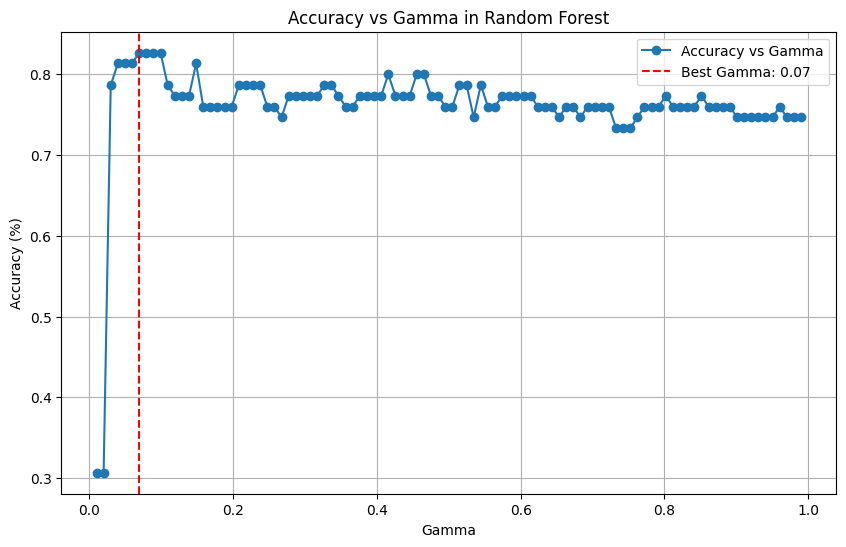

In [ ]:
def evaluate_RF_gammas(XTrain, XTest, yTrain, yTest, numEstimators=100, randomState=42, numGammas=100):
    """
    Evaluates Random Forest Classifier accuracy for various gamma (max_samples) values.
    Parameters:
    - XTrain, XTest: Features for training and testing.
    - yTrain, yTest: Labels for training and testing.
    - numEstimators: Number of trees in the forest.
    - randomState: Random seed for reproducibility.
    - numGammas: Number of gamma values to evaluate.

    Returns:
    - gammaArray: Array of gamma (max_samples) values tested.
    - accuracyArray: Array of accuracies corresponding to gamma values.
    """
    # Generate gamma values
    gammaArray = np.linspace(0.01, 0.99, numGammas)
    accuracyArray = np.zeros_like(gammaArray)

    # Loop through each gamma and evaluate
    for i, gamma in enumerate(gammaArray):
        # Initialize the Random Forest Classifier
        rfModel = RandomForestClassifier(
            random_state=randomState,
            n_estimators=numEstimators,
            bootstrap=True,
            max_samples=gamma)

        # Train the model
        rfModel.fit(XTrain, yTrain)

        # Make predictions and calculate accuracy
        yPred = rfModel.predict(XTest)
        accuracyArray[i] = accuracy_score(yTest, yPred)

    return gammaArray, accuracyArray

    # Call the function to evaluate different gammas
gammaArray, accuracyArray = evaluate_RF_gammas(
        XTrain=XTrain, XTest=XTest,
        yTrain=yTrain, yTest=yTest,
        numEstimators=100, randomState=42, numGammas=100)

# Find the optimal gamma and accuracy
optimalGammaIndex = np.argmax(accuracyArray)
optimalGamma = gammaArray[optimalGammaIndex]
optimalAccuracy = accuracyArray[optimalGammaIndex]

print(f"Best gamma: {optimalGamma:.2f}")
print(f"Highest accuracy achieved: {bestAccuracy:.2f}%")

# Plot accuracy vs gamma
plt.figure(figsize=(10, 6))
plt.plot(gammaArray, accuracyArray, marker='o', label="Accuracy vs Gamma")
plt.axvline(optimalGamma, color='r', linestyle='--', label=f"Best Gamma: {optimalGamma:.2f}")
plt.xlabel("Gamma")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Gamma in Random Forest")
plt.legend()
plt.grid()
plt.show()